<a href="https://colab.research.google.com/github/breakdown-voltage/SpinLatticeSimulation/blob/main/Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initializing the functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calc_energy(k: float, l: np.array, N: int):
    sum = 0
    for i in range(N):
      for j in range(N):
        if i>0:
          sum+=l[i][j]*l[i-1][j]
        else:
          sum+=l[i][j]*l[N-1][j]
        if j>0:
          sum+=l[i][j]*l[i][j-1]
        else:
          sum+=l[i][j]*l[i][N-1]
        if i<N-1:
          sum+=l[i][j]*l[i+1][j]
        else:
          sum+=l[i][j]*l[0][j]
        if j<N-1:
          sum+=l[i][j]*l[i][j+1]
        else:
          sum+=l[i][j]*l[i][0]
    return -k*sum/2

def Magnetisation(l, N):
  sum = 0
  for i in range(N):
    for j in range(N):
      sum+=l[i][j]
  return sum/N**2

def createLattice(N):
  spins = [-1, 1]
  lattice = np.ones((N, N))
  for i in range(N):
    for j in range(N):
      lattice[i][j] = np.random.choice(spins)
  return lattice

def f(x, k):
    return np.exp(-x/k)

def random_flip(array):
  flip_iters = int(N*N*np.random.rand()/10)
  for i in range(flip_iters):
    a = int(N*np.random.rand())
    b = int(N*np.random.rand())
    array[a][b] = -array[a][b]
  return array

Arrays For Temperatures and J values

In [ ]:
a = np.linspace(0.1, 0.9, 9)
b = np.logspace(-2, 2, 5)

Metropolis Algorithm Implementation

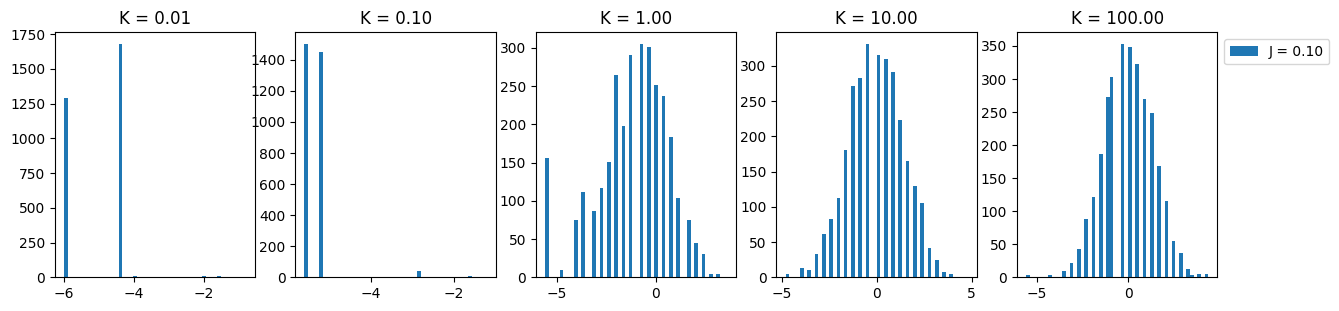

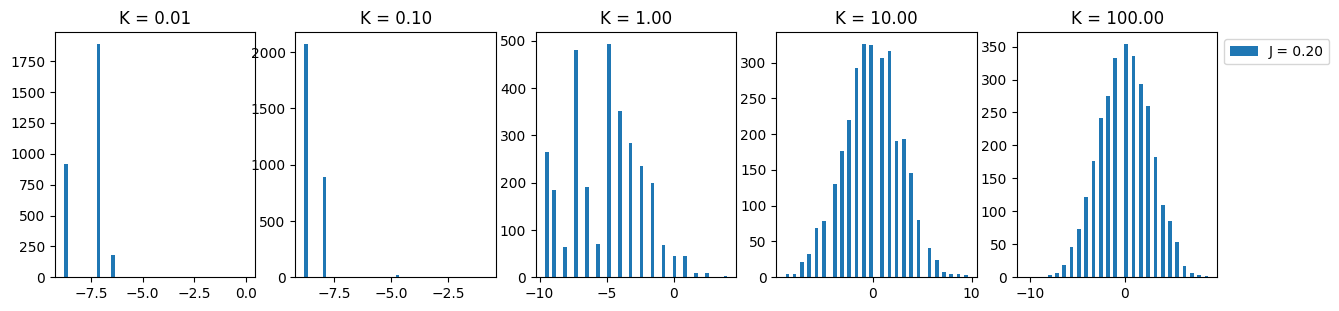

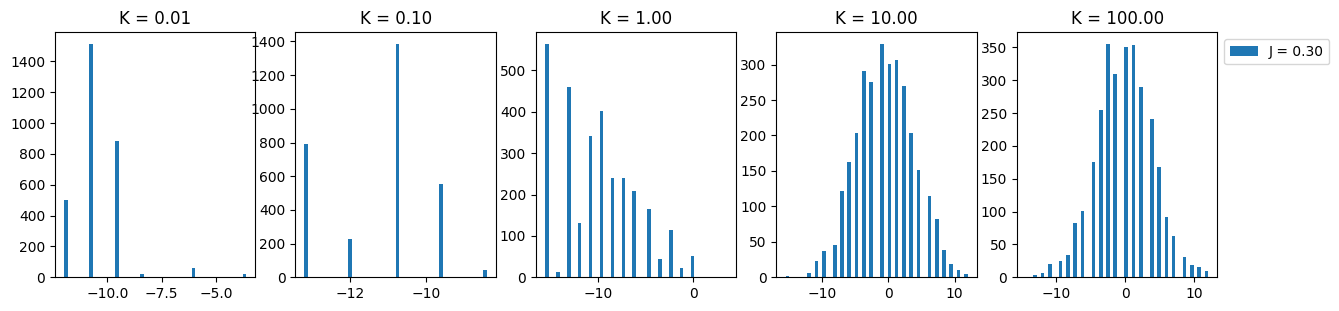

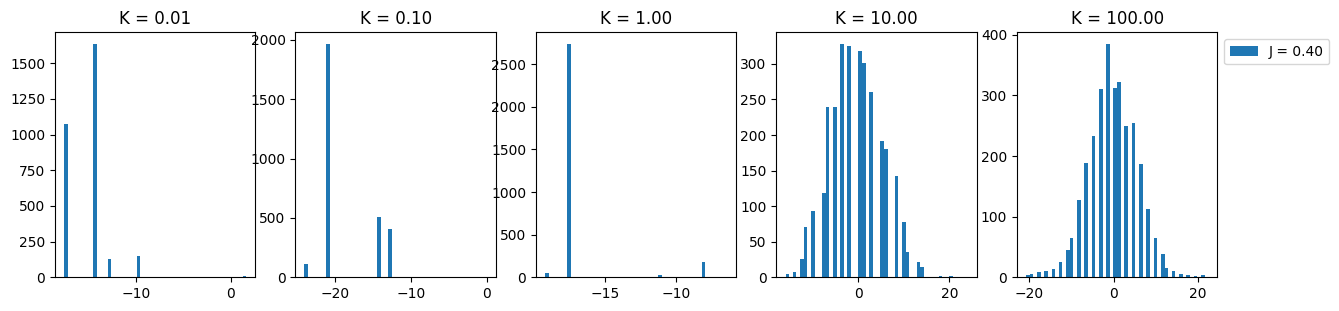

<ipython-input-23-641ad86901aa>:42: RuntimeWarning: overflow encountered in exp
  return np.exp(-x/k)


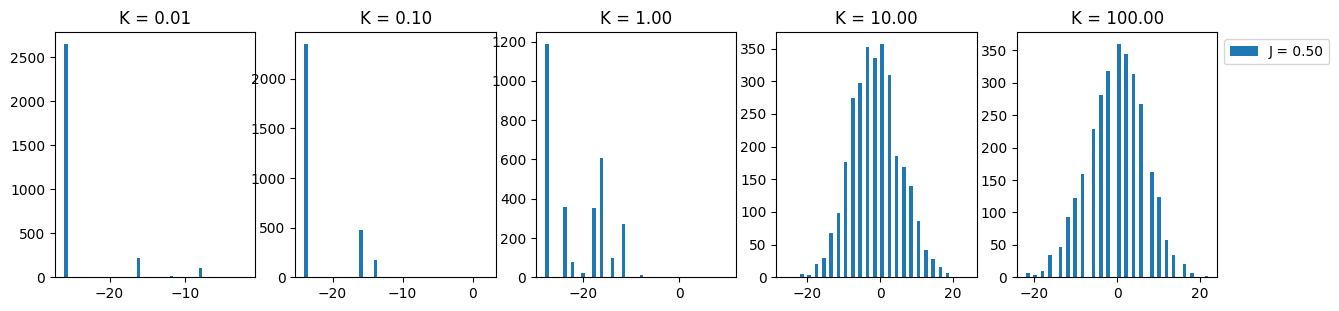

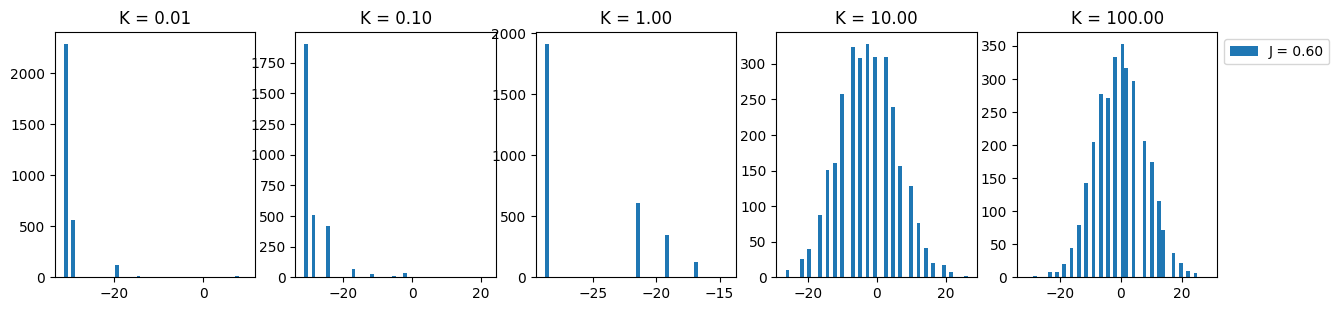

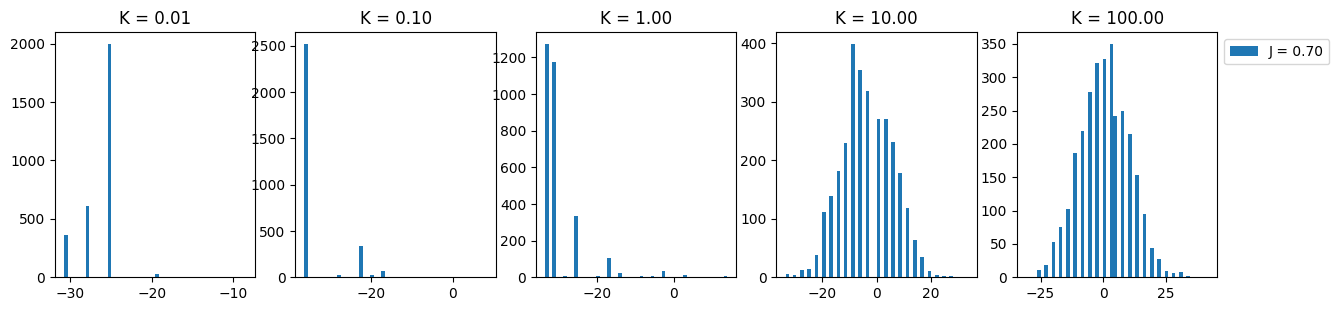

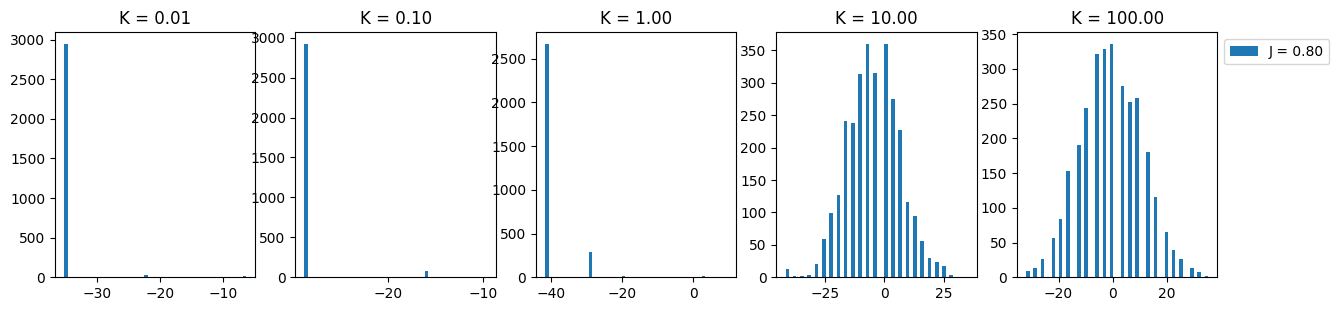

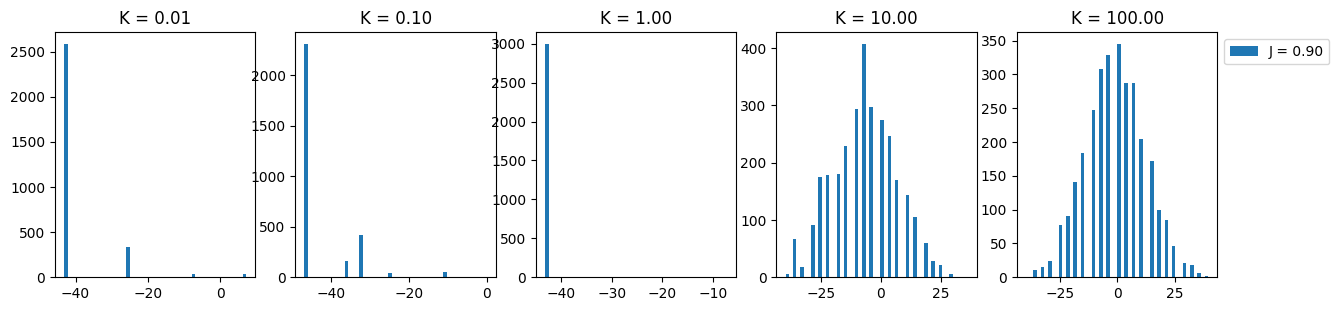

In [ ]:
N = 10
E_all = []
M_all = []

lattice_start = createLattice(N)

for j in a:
  plt.figure(figsize=(15, 7))
  for index, i in enumerate(b):
    J = j
    E0 = calc_energy(J, lattice_start, N)
    iters = 3000
    dE = 0.01
    E = []
    avgE=[]
    avgM = []
    K = i
    lattice = lattice_start
    mag_sum = 0
    eng_sum = 0
    for _ in range(iters):
      E.append(E0)
      eng_sum+=E0
      mag_sum+=Magnetisation(lattice, N)
      avgE.append(eng_sum/(len(avgE)+1))
      avgM.append(mag_sum/(len(avgM)+1))
      lattice_test = lattice
      lattice_test = random_flip(lattice_test)
      E1 = calc_energy(J, lattice_test, N)
      acceptance = min(1, (f((E1 - E0), K)))
      if np.random.rand()<acceptance:
        lattice = lattice_test
        E0 = E1

# Uncomment to print lattice at the end if K=0.01 or 0.1
    # if(K==0.01 or K==0.1):
    #   print(lattice)

    E_all.append(avgE)
    M_all.append(avgM)

    plt.subplot(2, 5, (index+1) )
    plt.title(f'K = {i:.2f}')
    plt.hist(E, bins = 50, label=f"J = {j:.2f}")
  plt.legend(bbox_to_anchor = (1,1))
  plt.show()



To plot Magnetization vs Temperature at different values of J

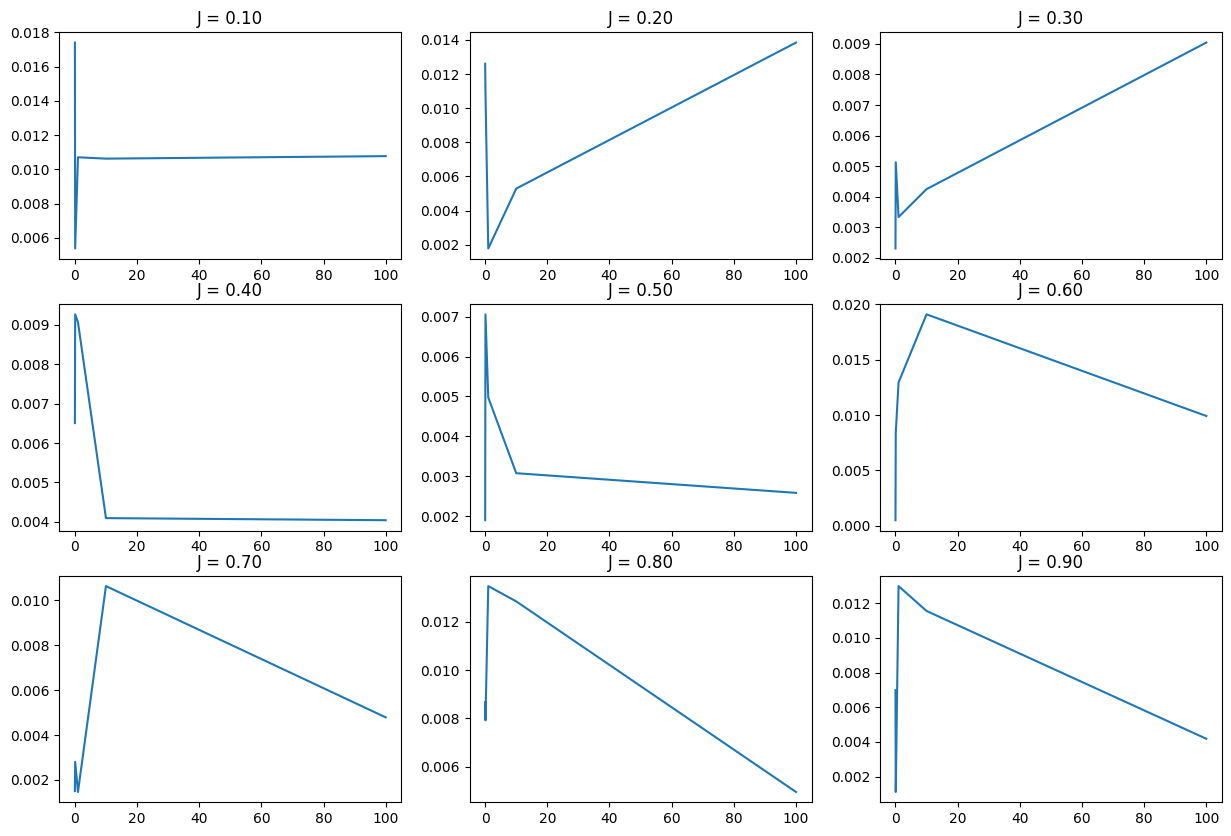

In [ ]:
plt.figure(figsize=(15, 10))
end_mags = np.array([np.abs(k[-1]) for k in M_all]).reshape(9, 5)
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.title(f"J = {a[i]:.2f}")
  plt.plot(b, end_mags[i, :], label=f'J = {a[i]}')

plt.show()

To plot the moving averages of Energy with Monte Carlo Steps

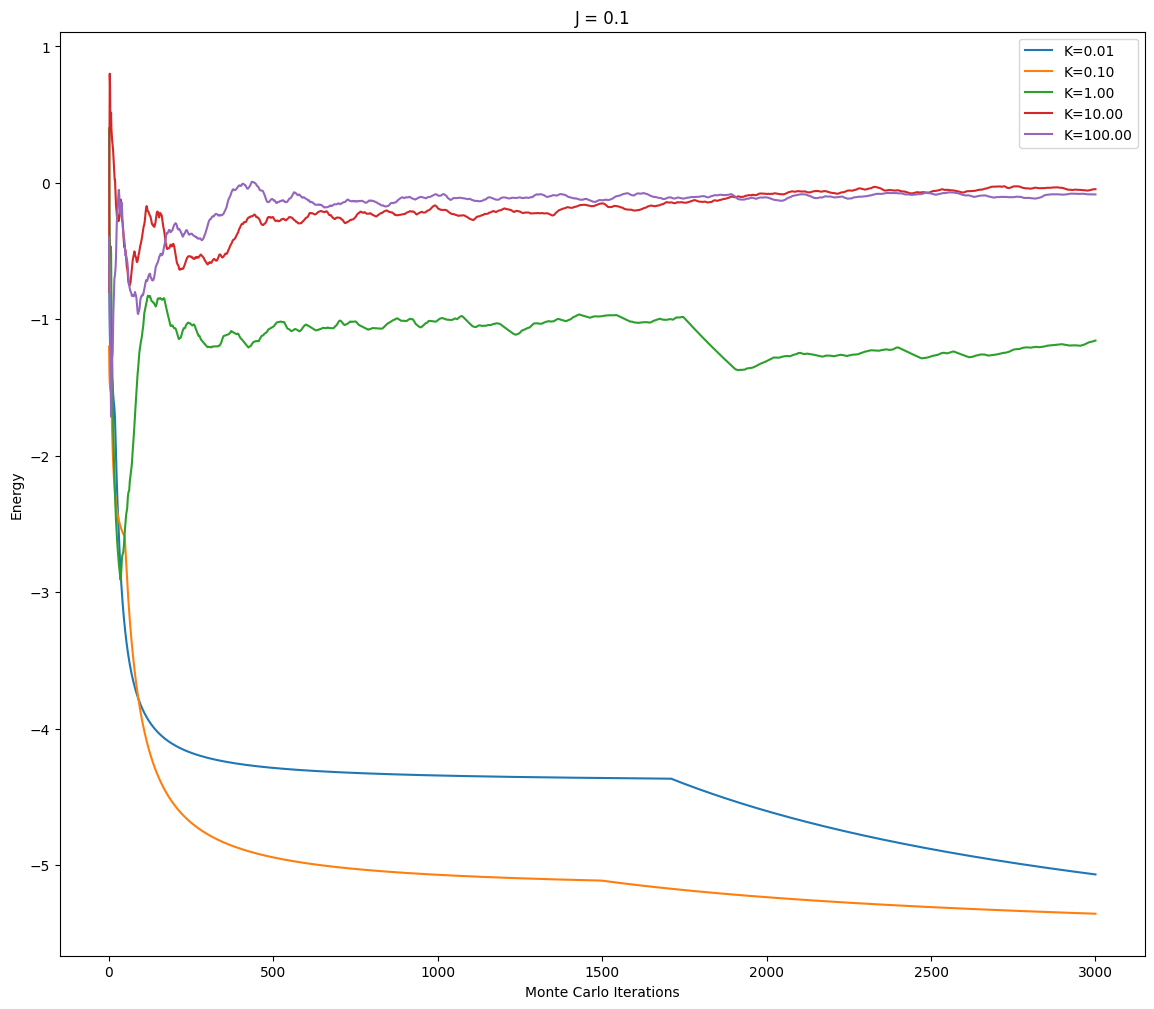

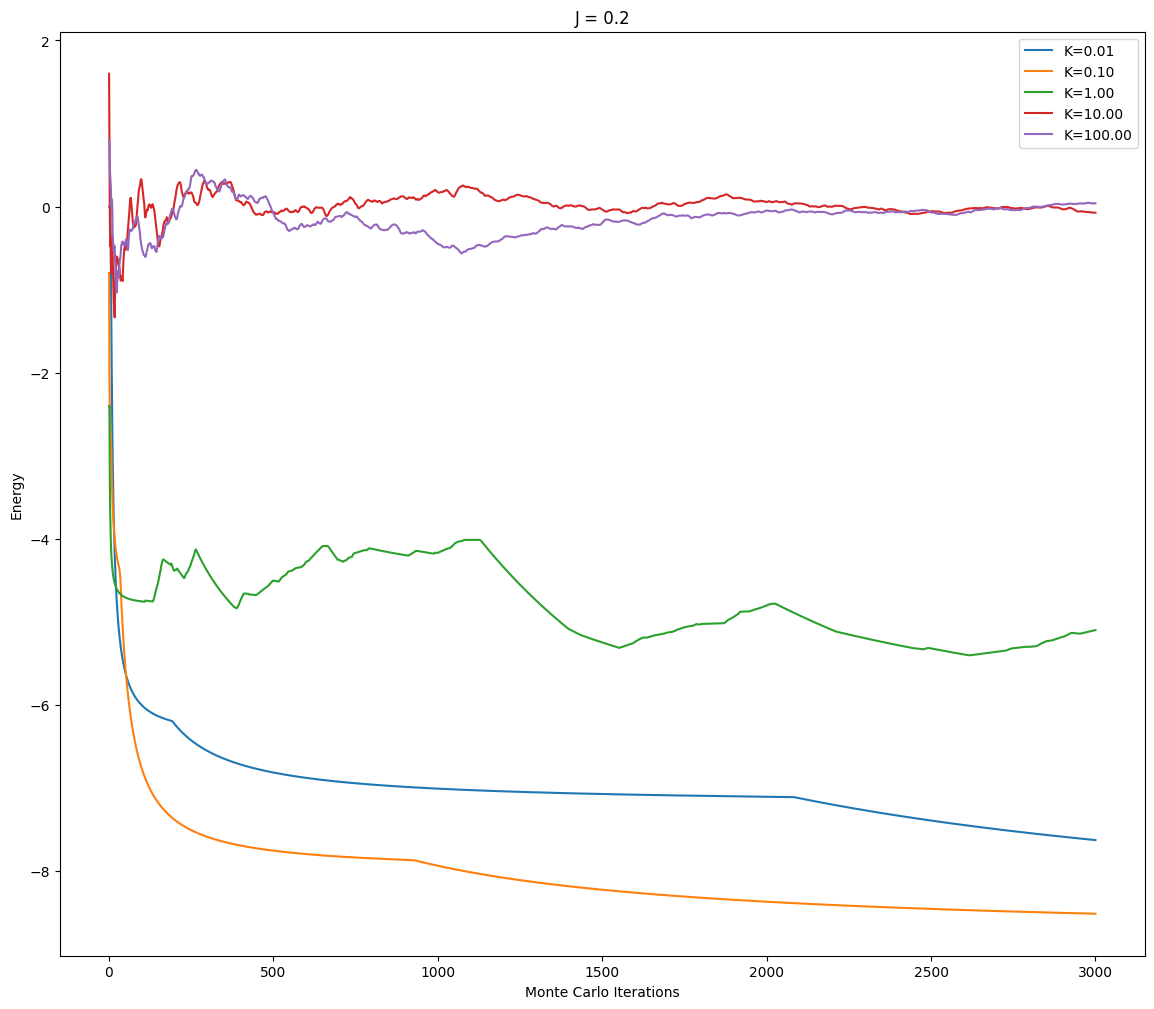

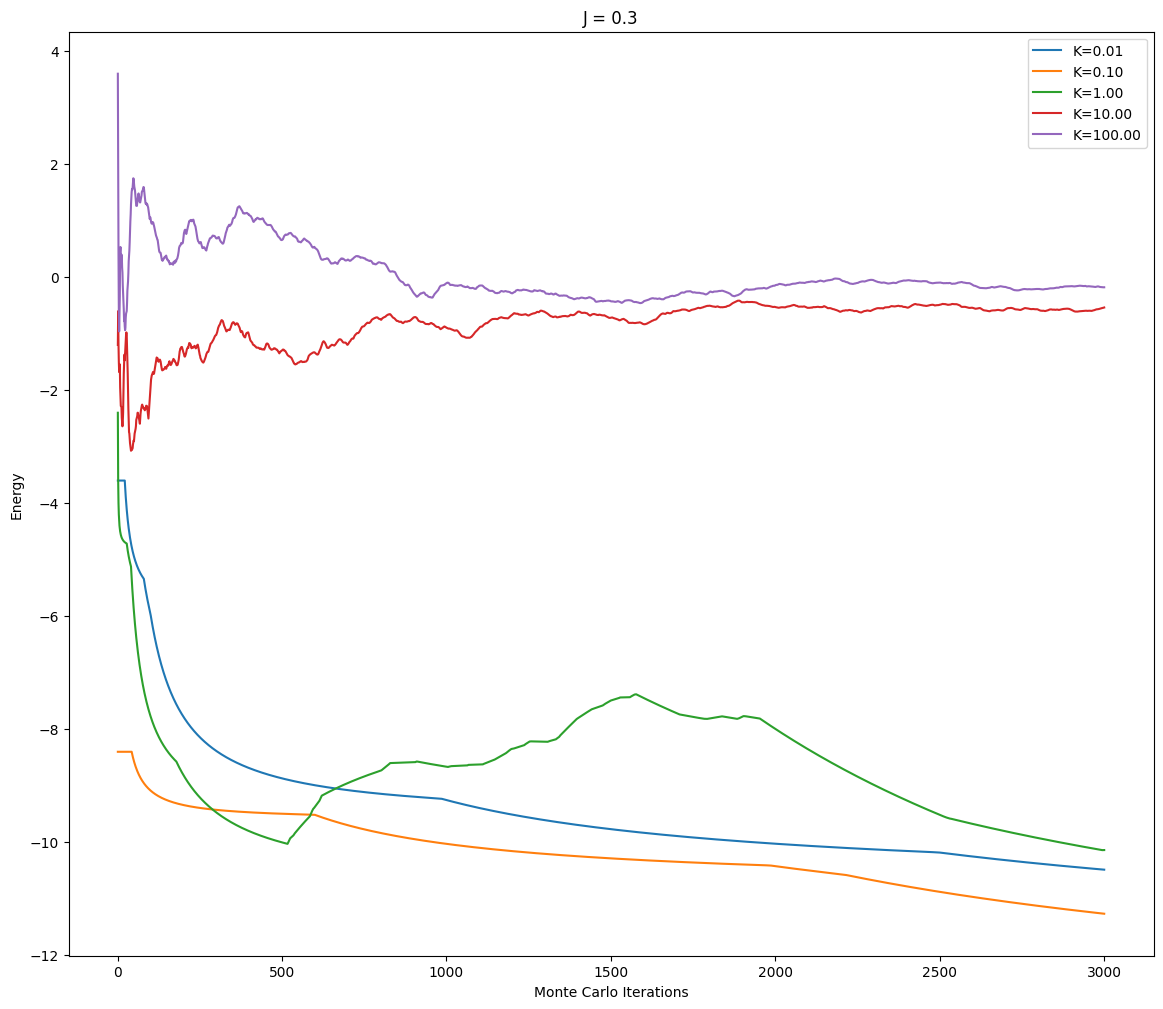

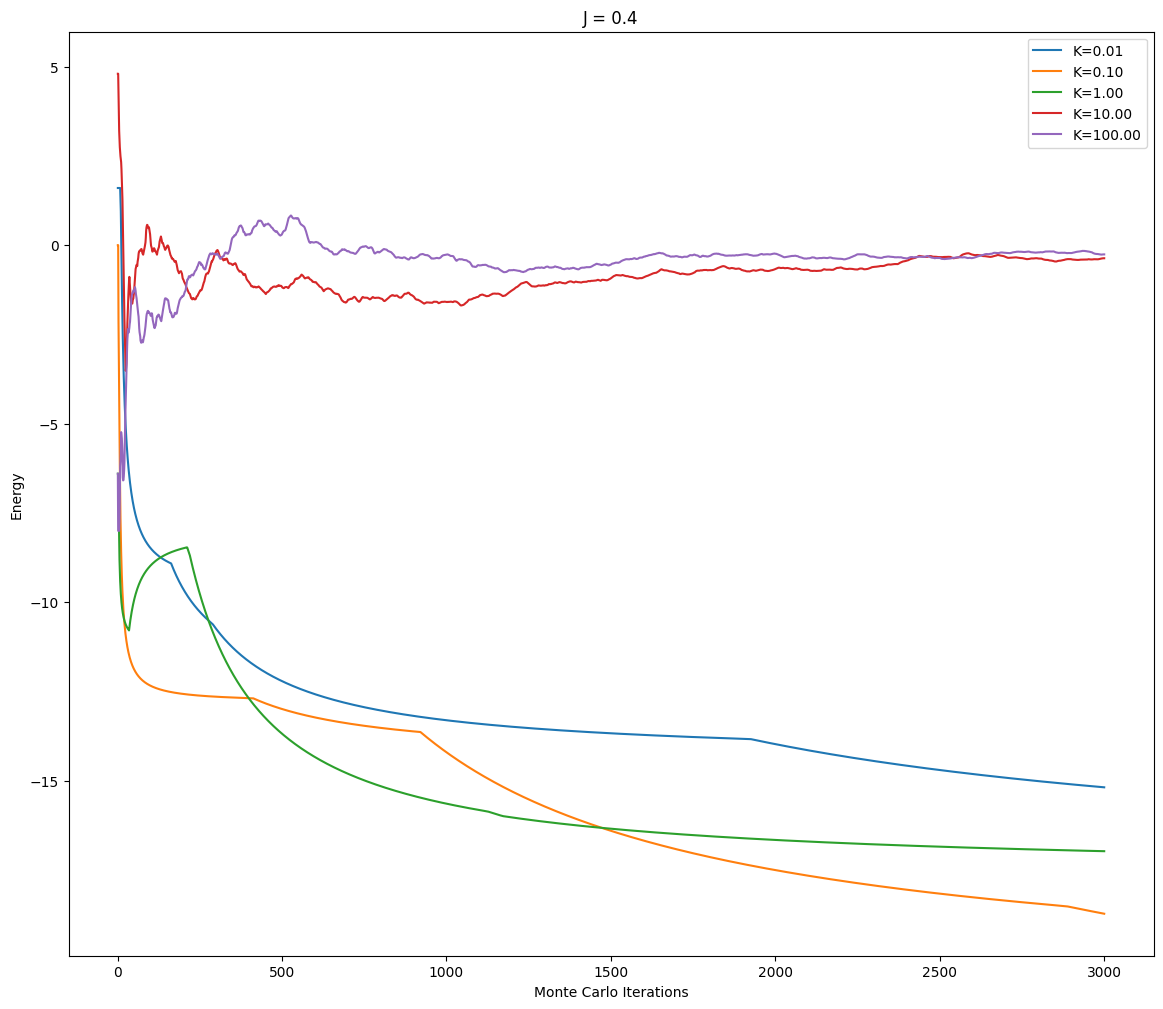

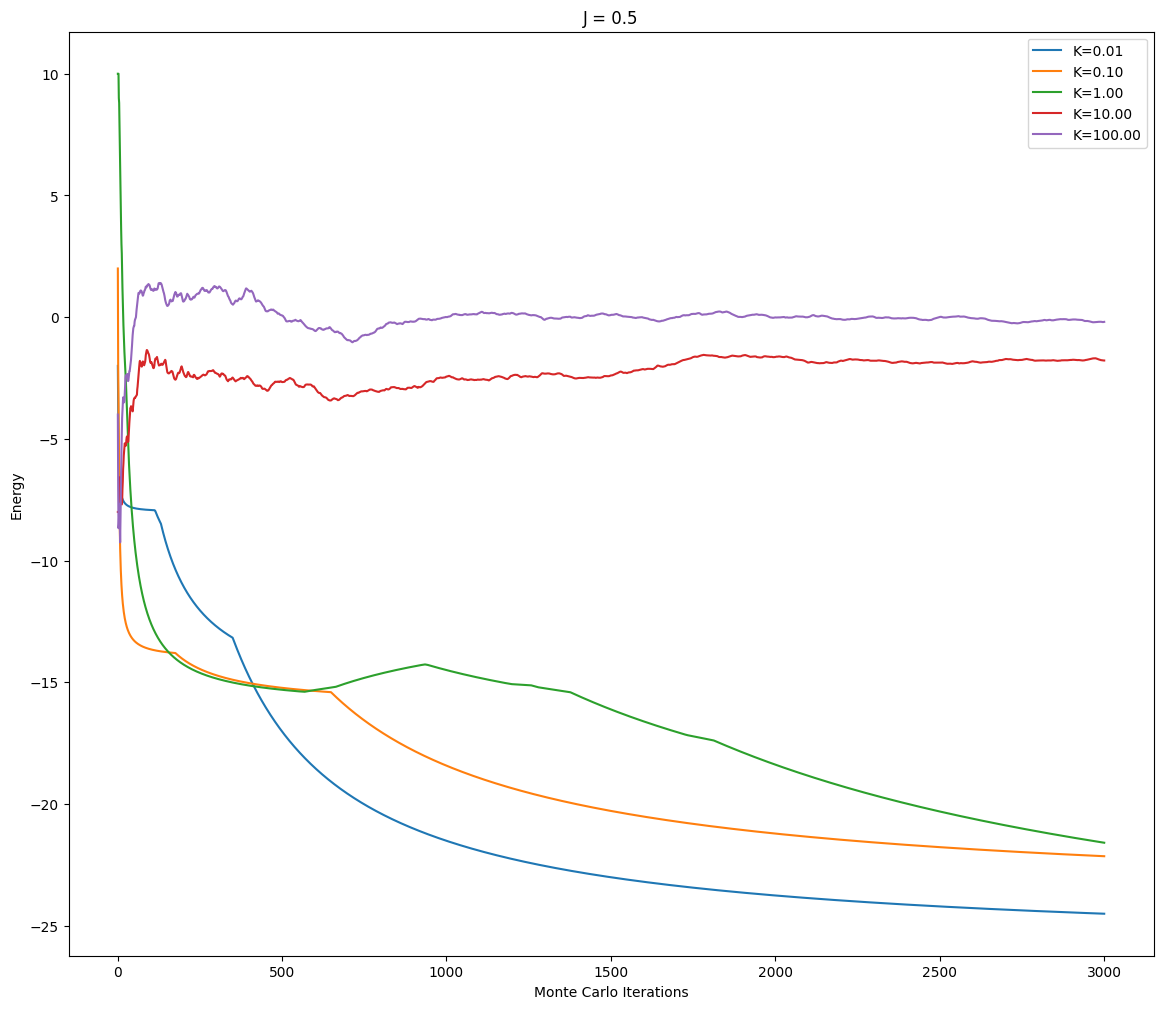

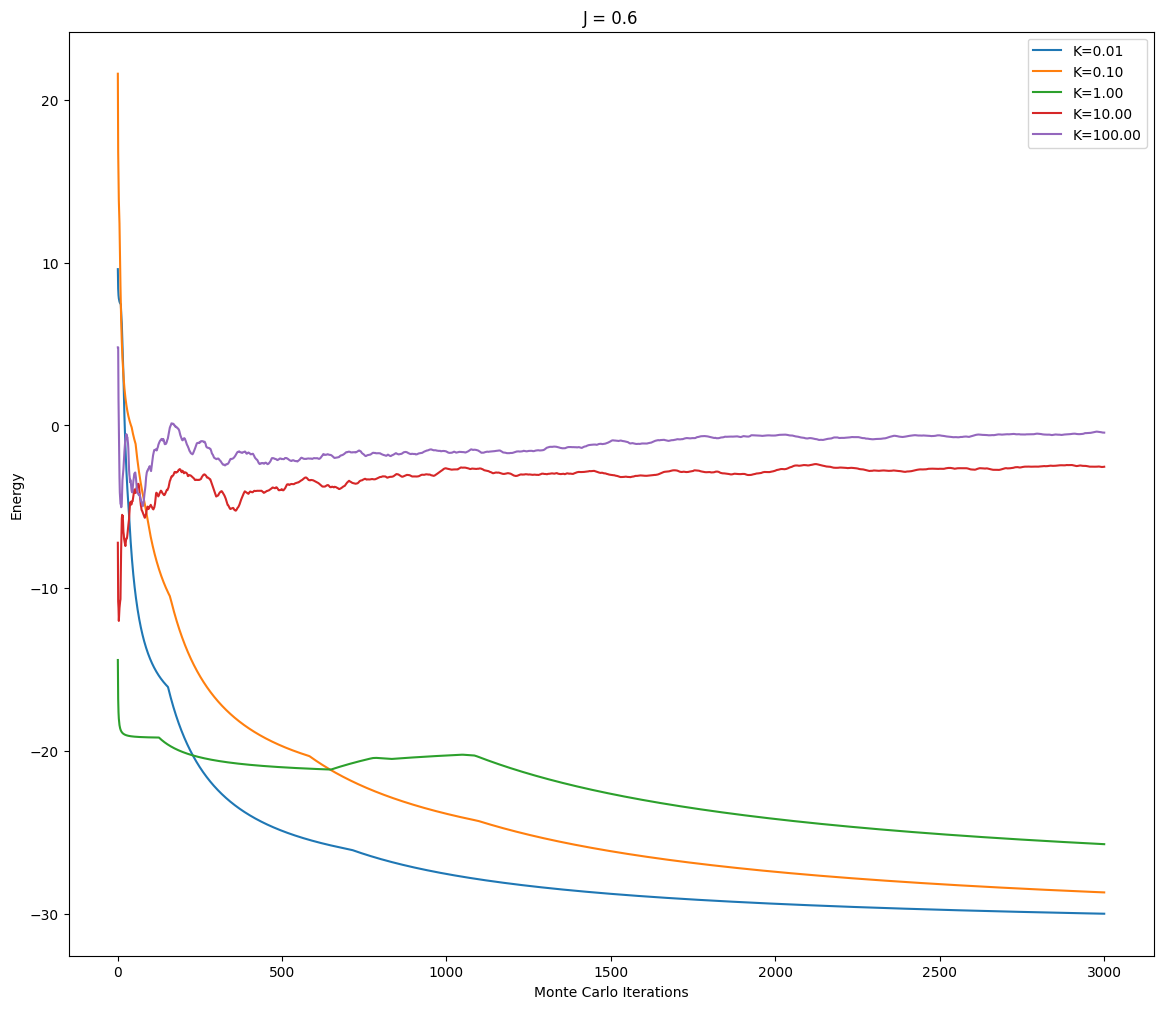

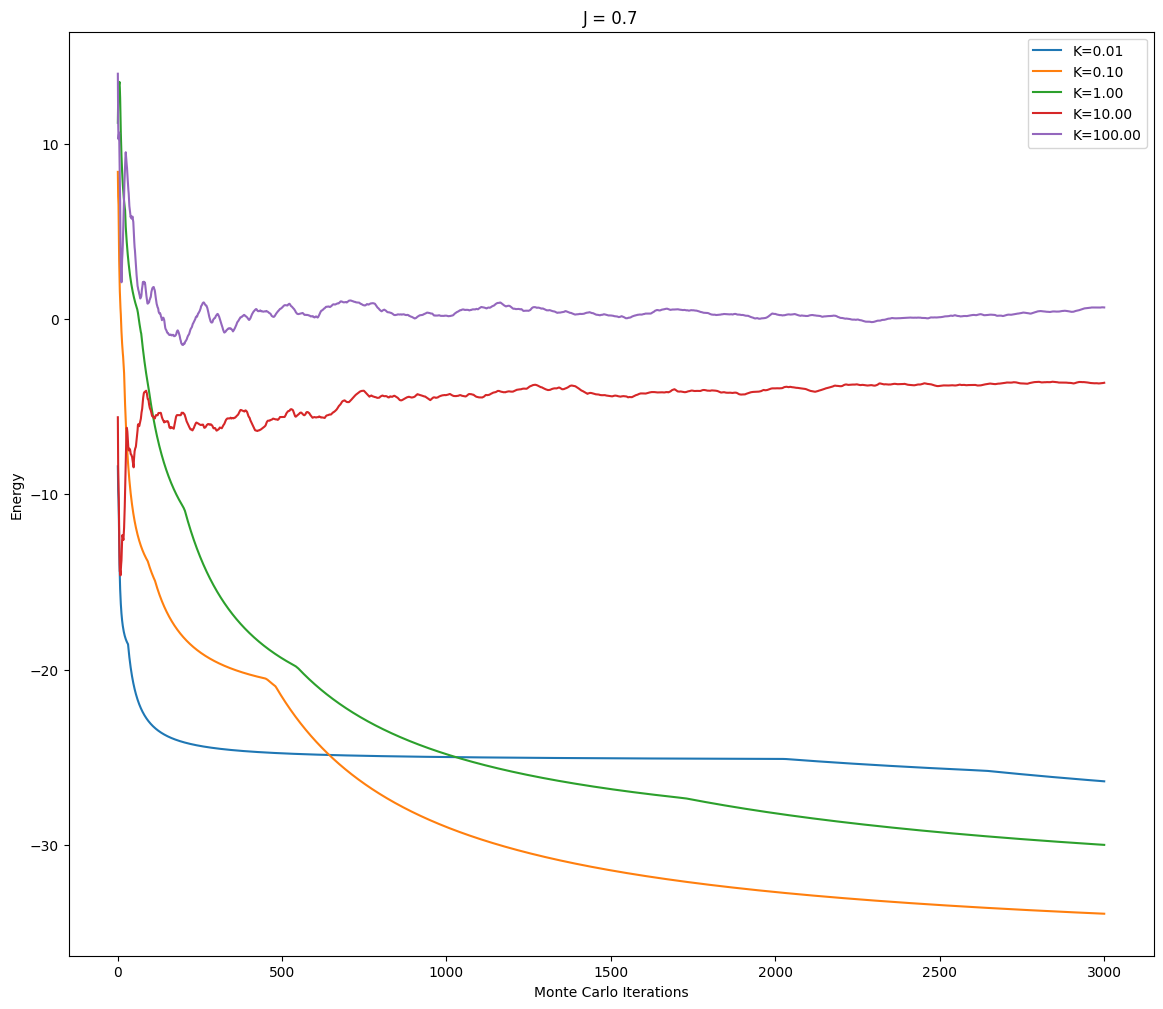

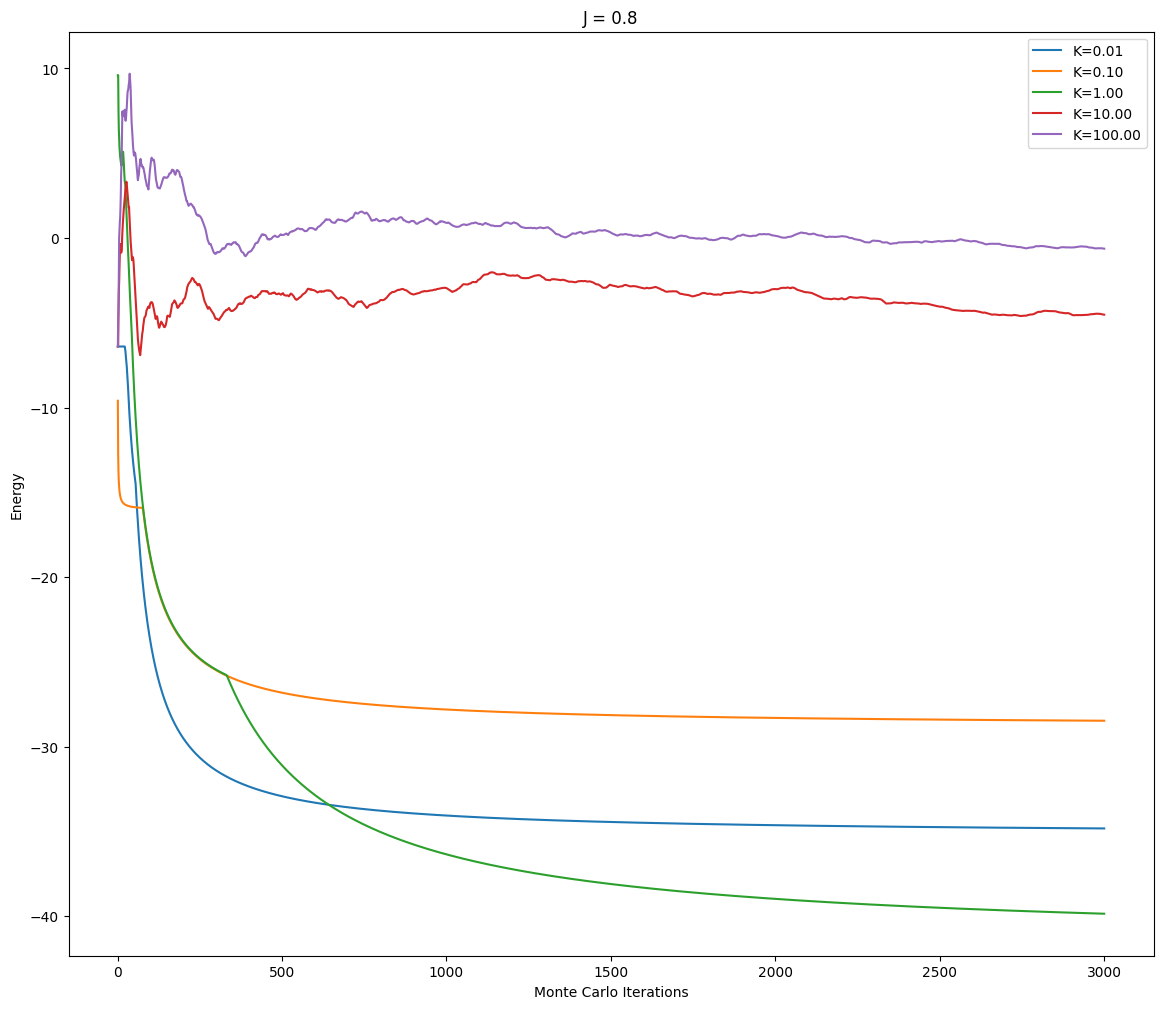

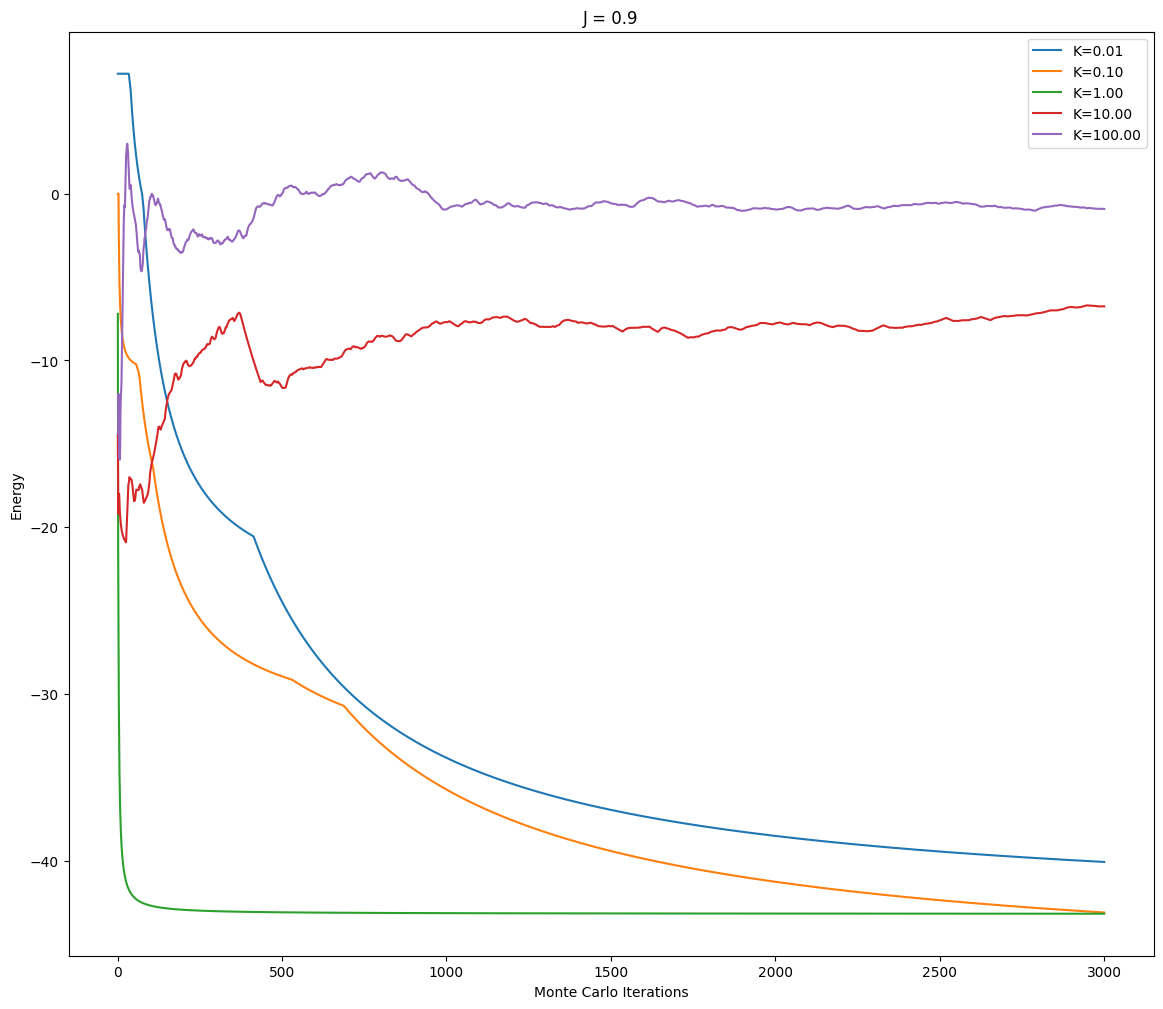

In [ ]:
E_all = np.array(E_all).reshape(9, 5, 3000)
M_all = np.array(M_all).reshape(9, 5, 3000)
x_pts = np.linspace(1, iters, iters)
for i in range(len(E_all)):
    plt.figure(figsize=(14, 12))
    for j in range(len(E_all[i])):
        plt.title(f"J = {a[i]:.1f}")
        plt.plot(x_pts, E_all[i, j, :], label=f"K={b[j]:.2f}")
        plt.xlabel('Monte Carlo Iterations')
        plt.ylabel('Energy')
    plt.legend()
    plt.show()

To plot the moving averages of Magnetization with Monte Carlo Steps

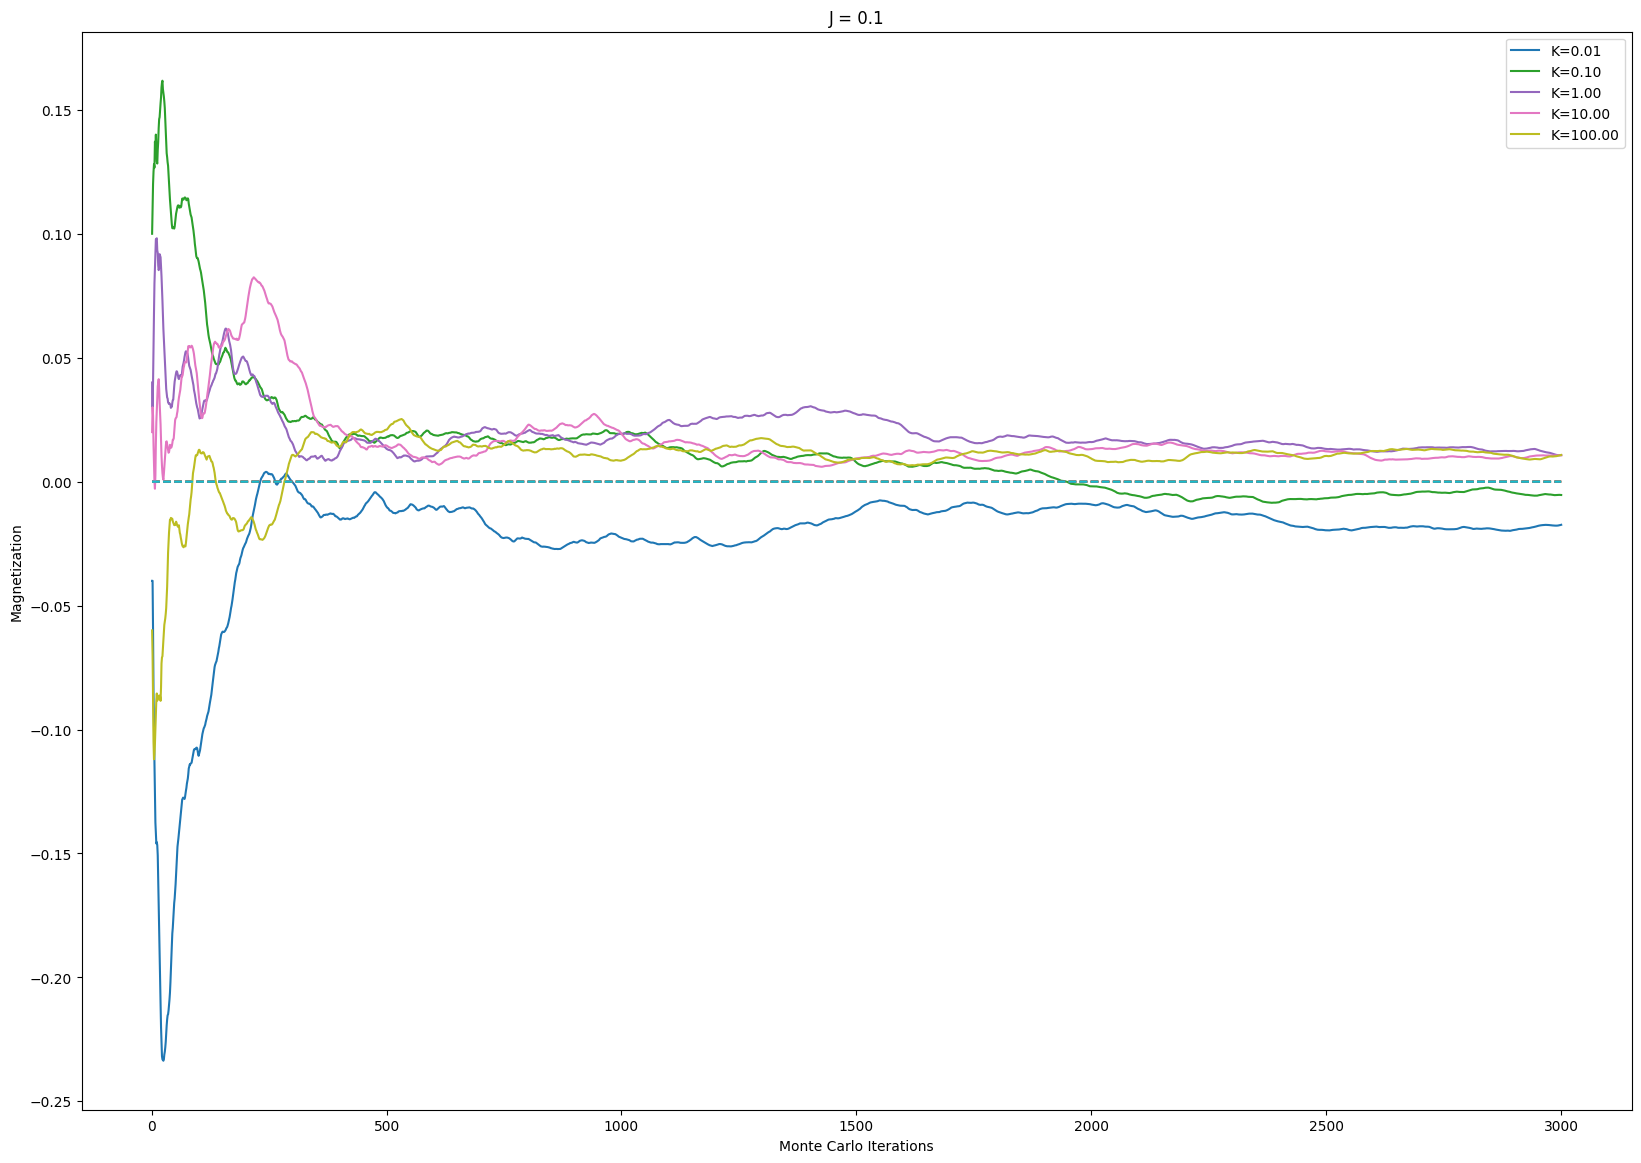

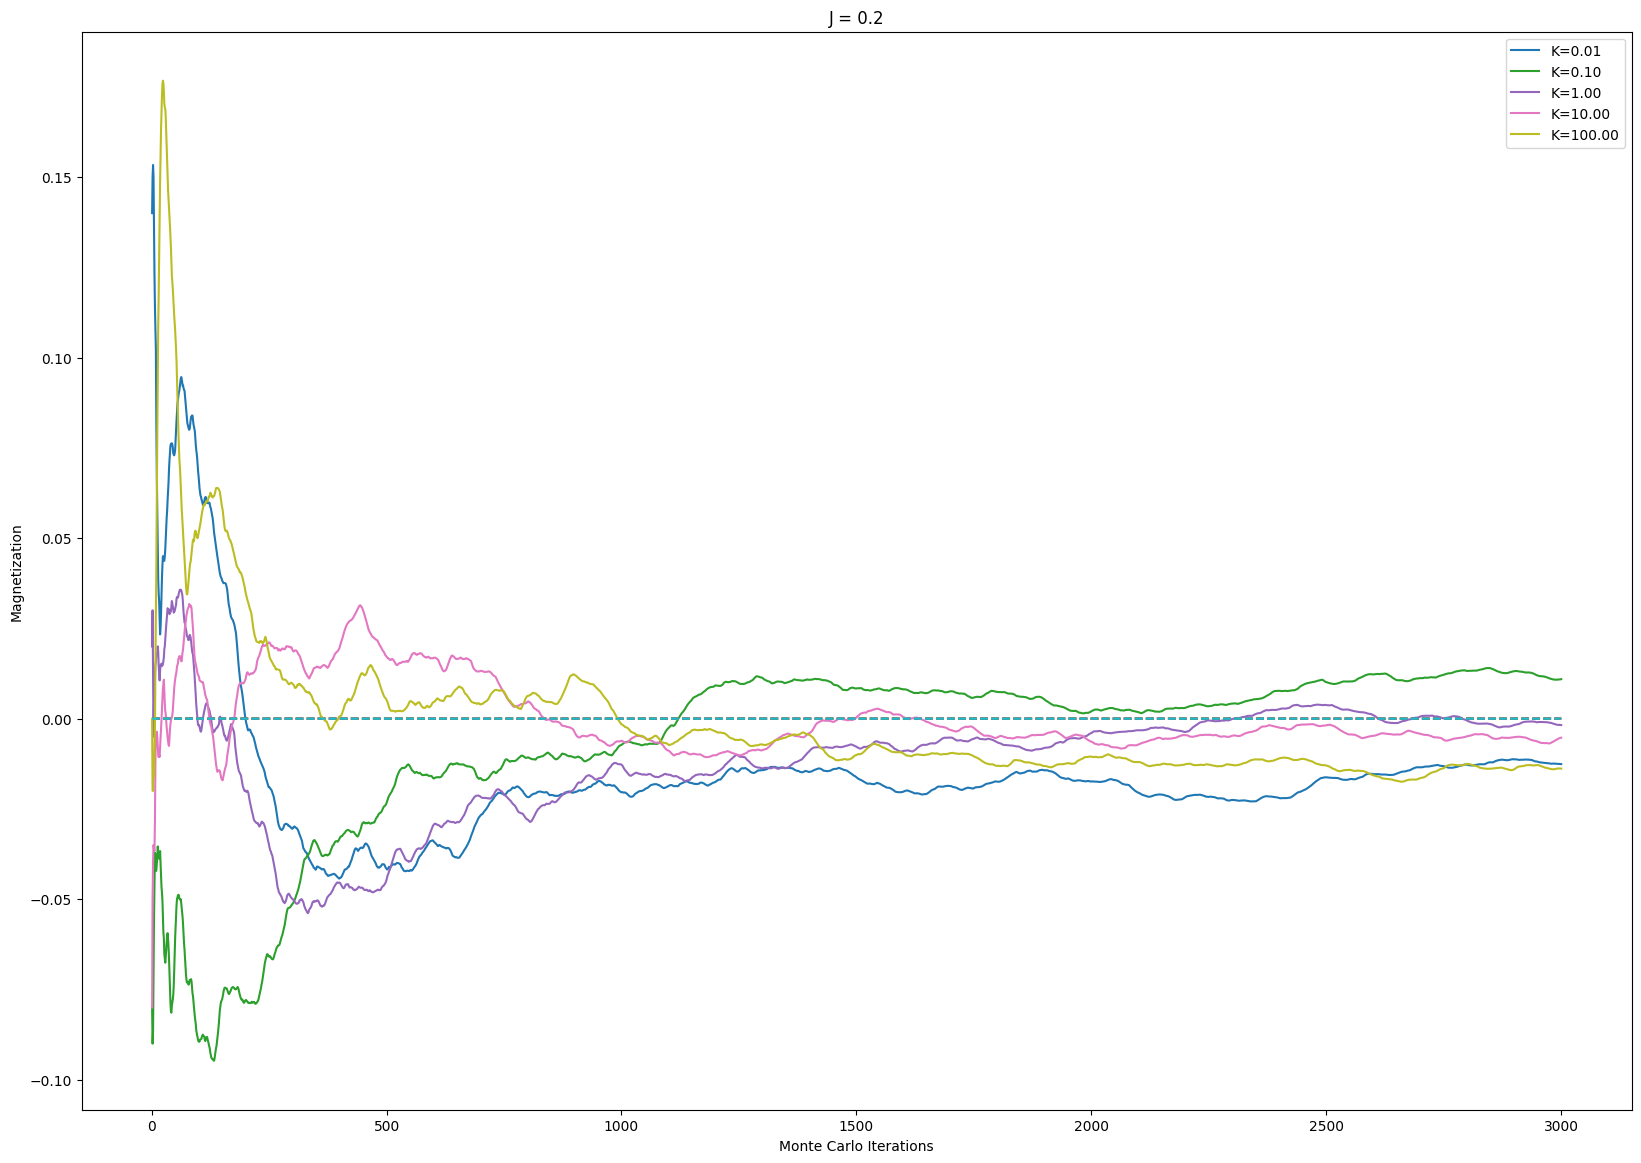

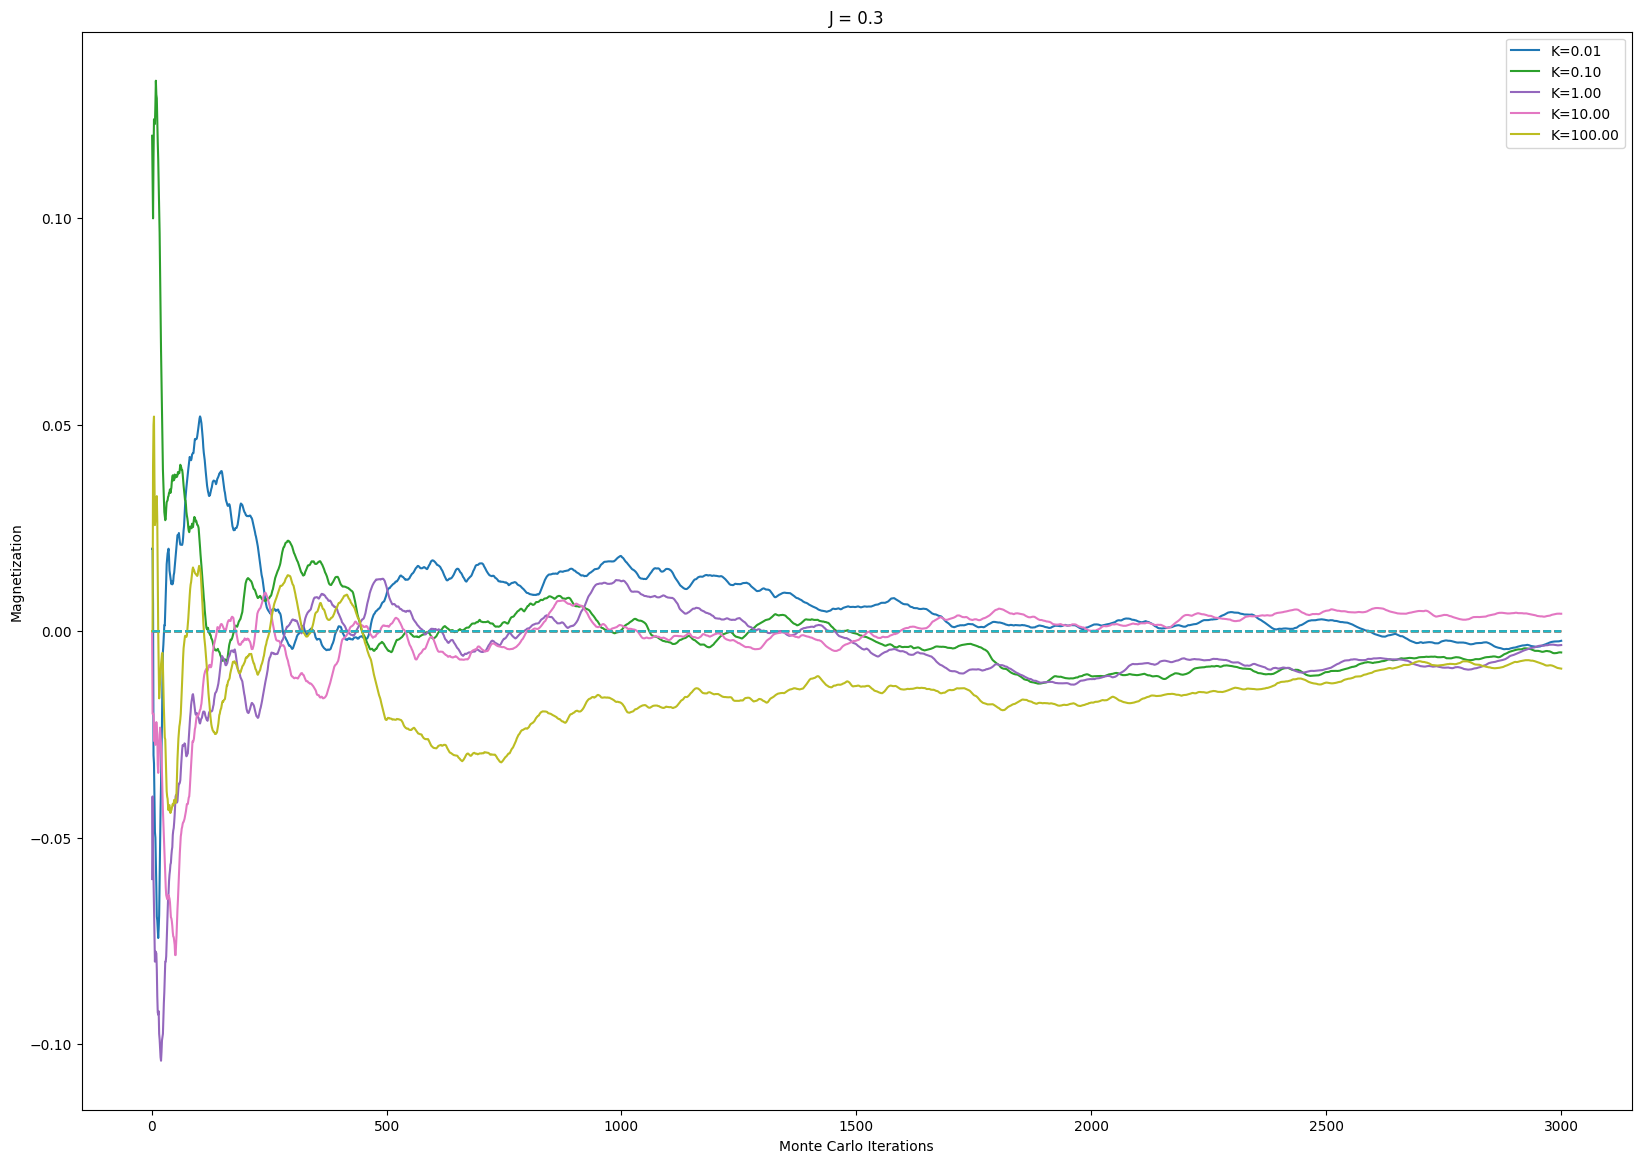

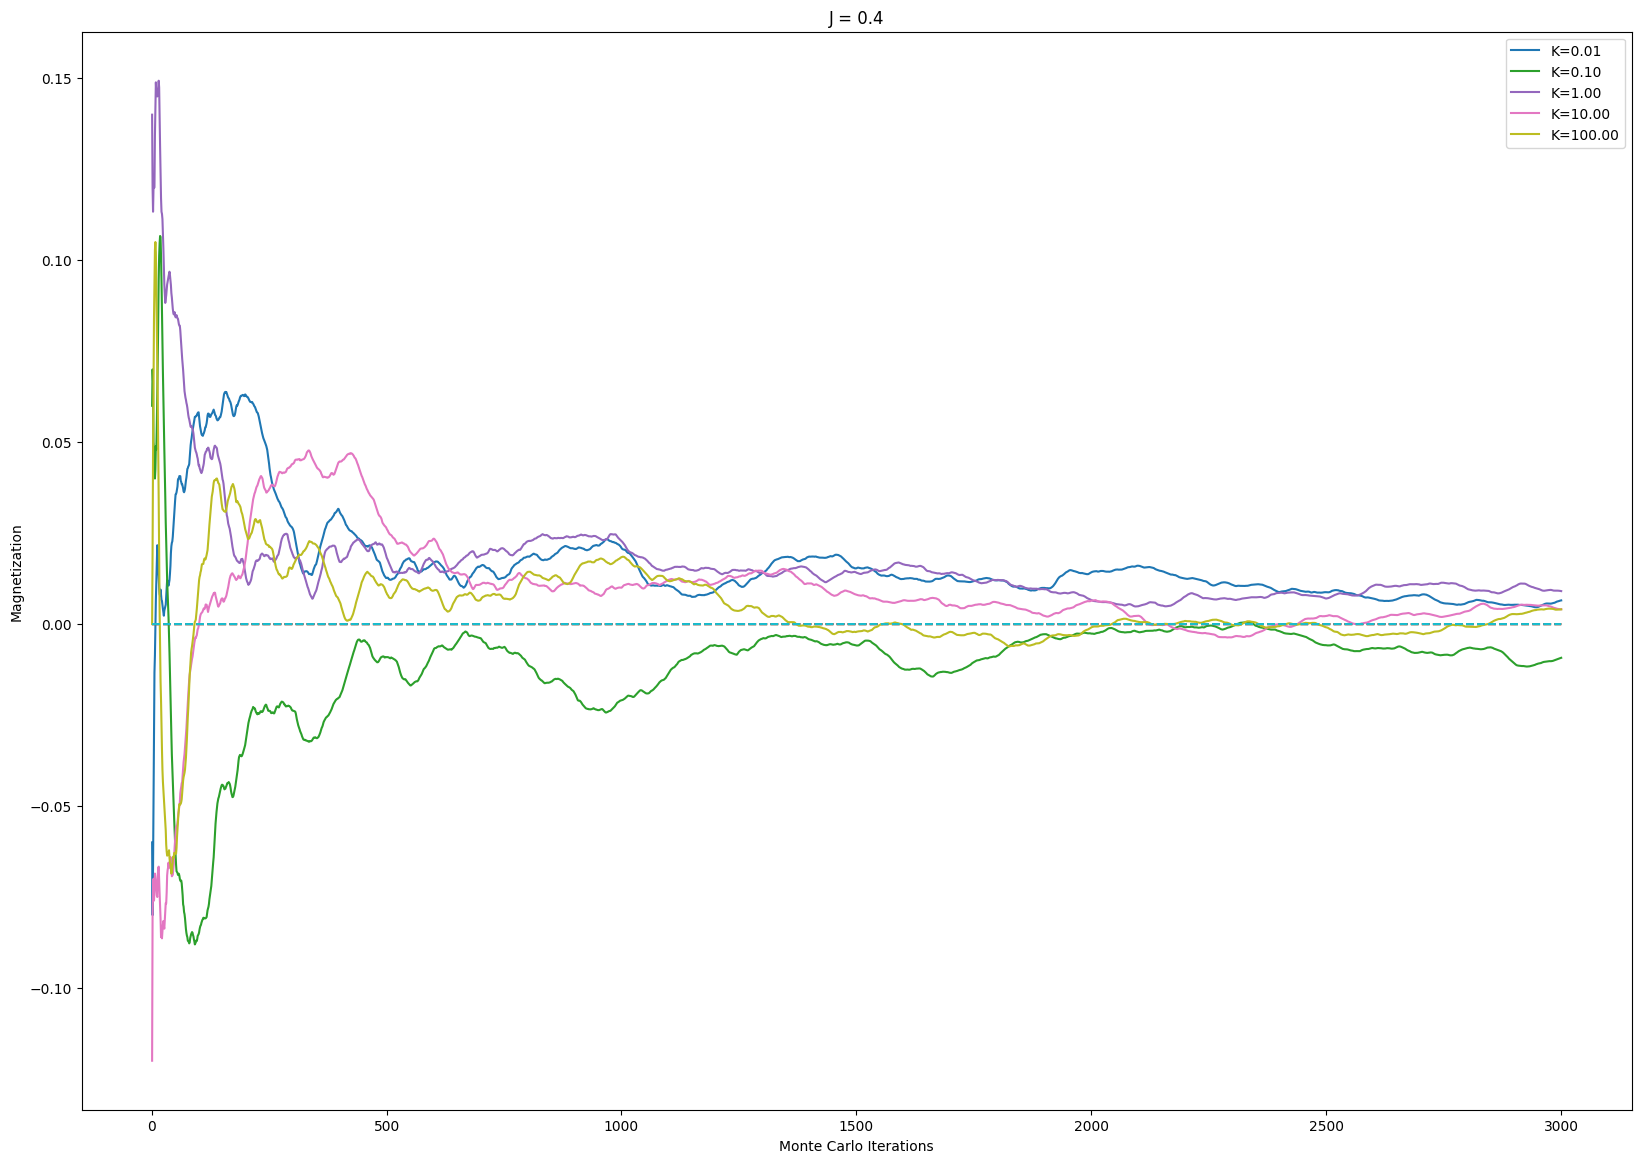

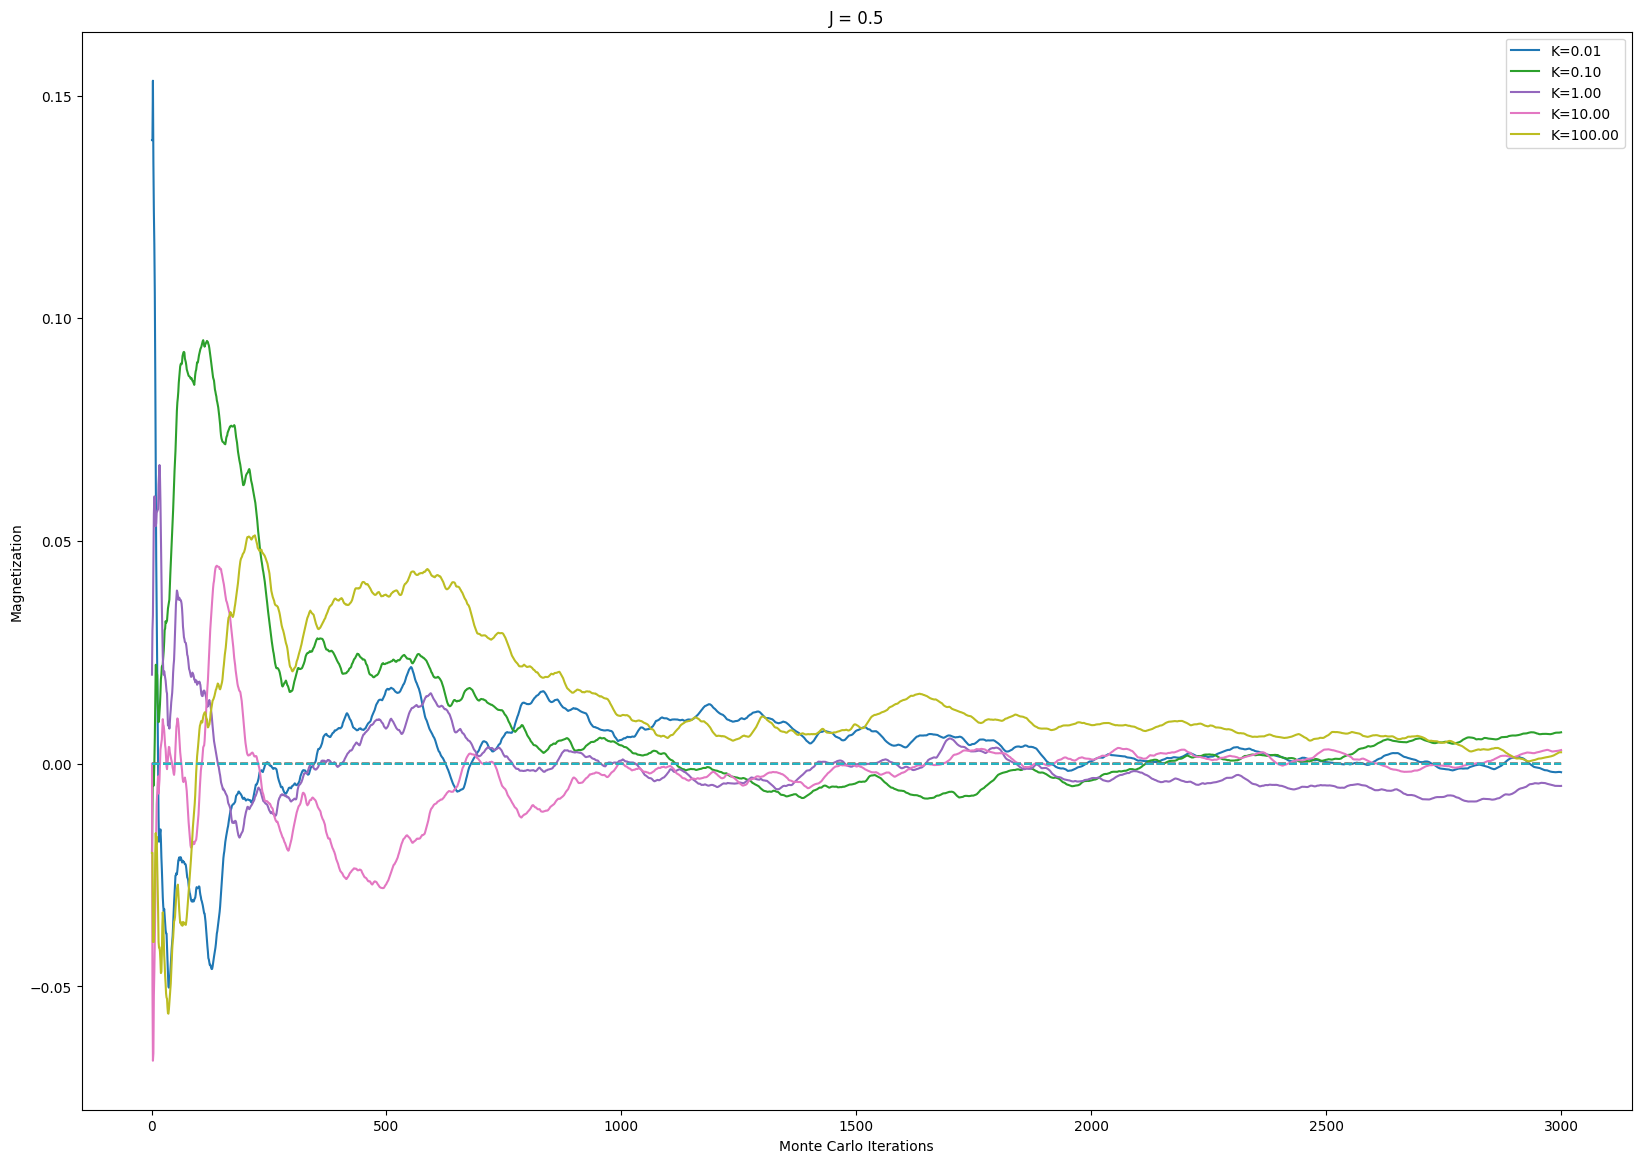

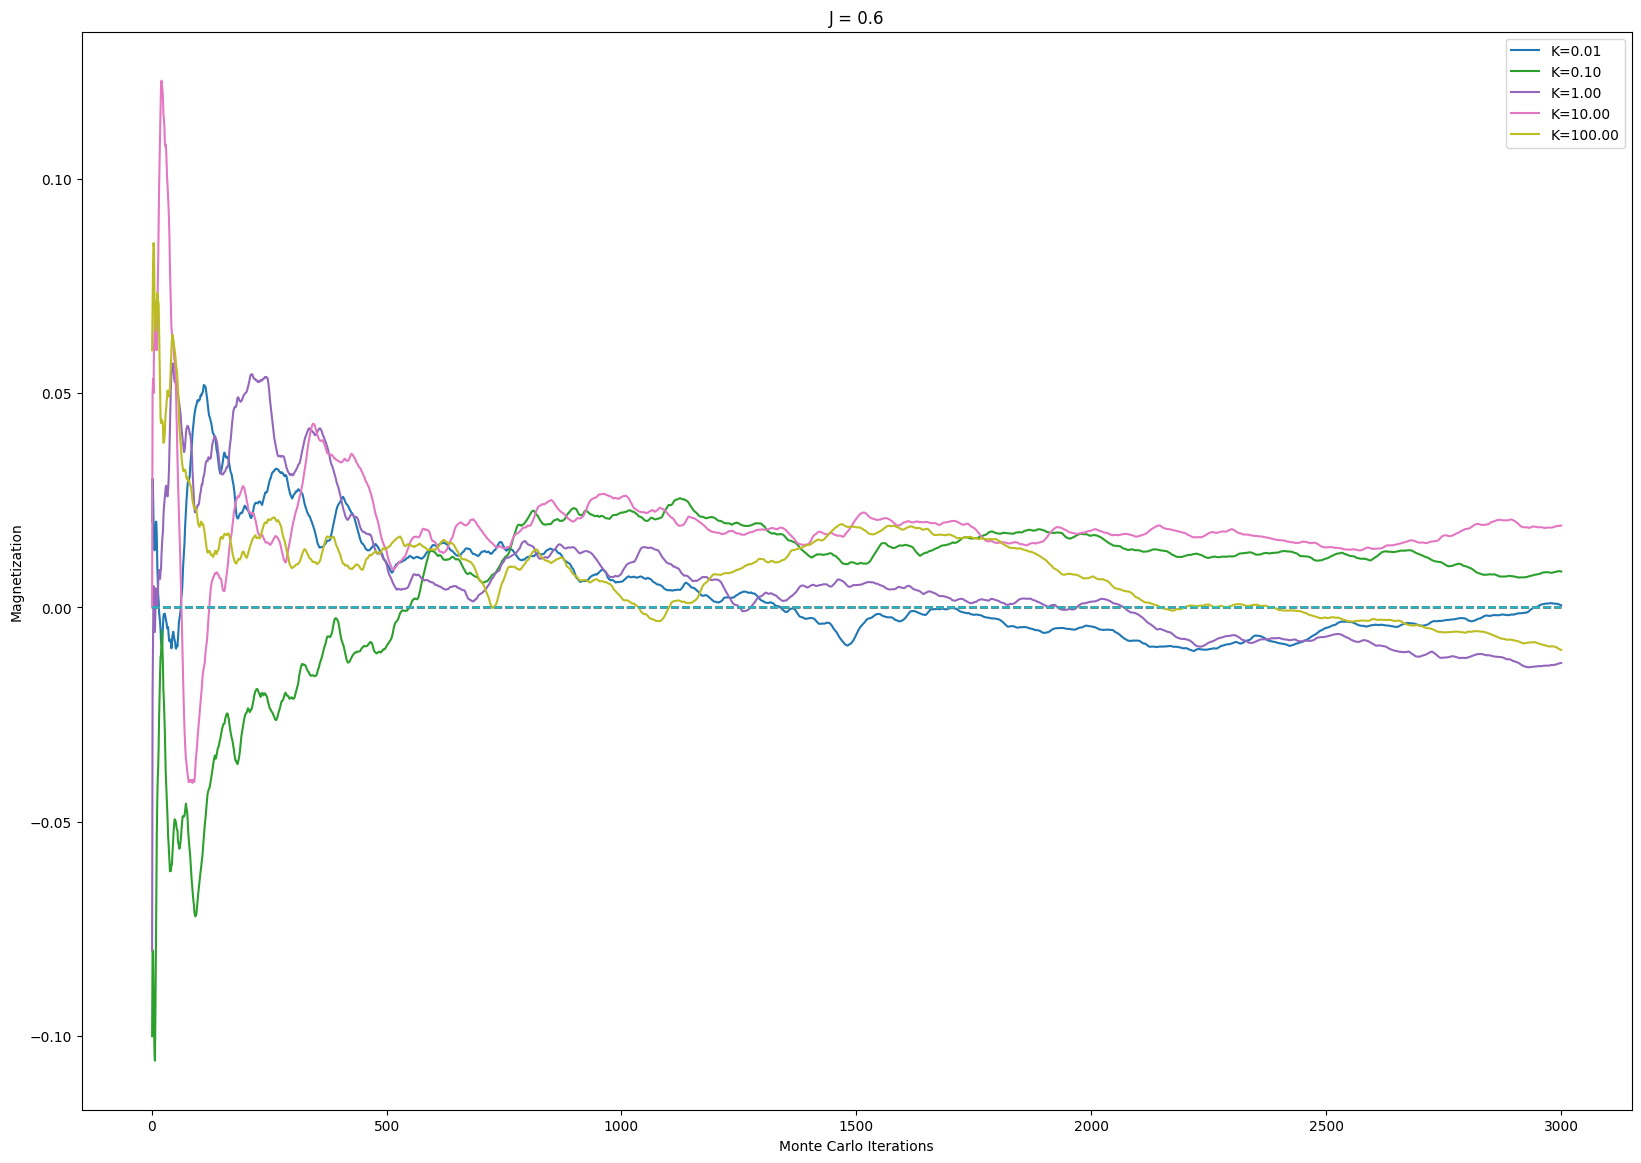

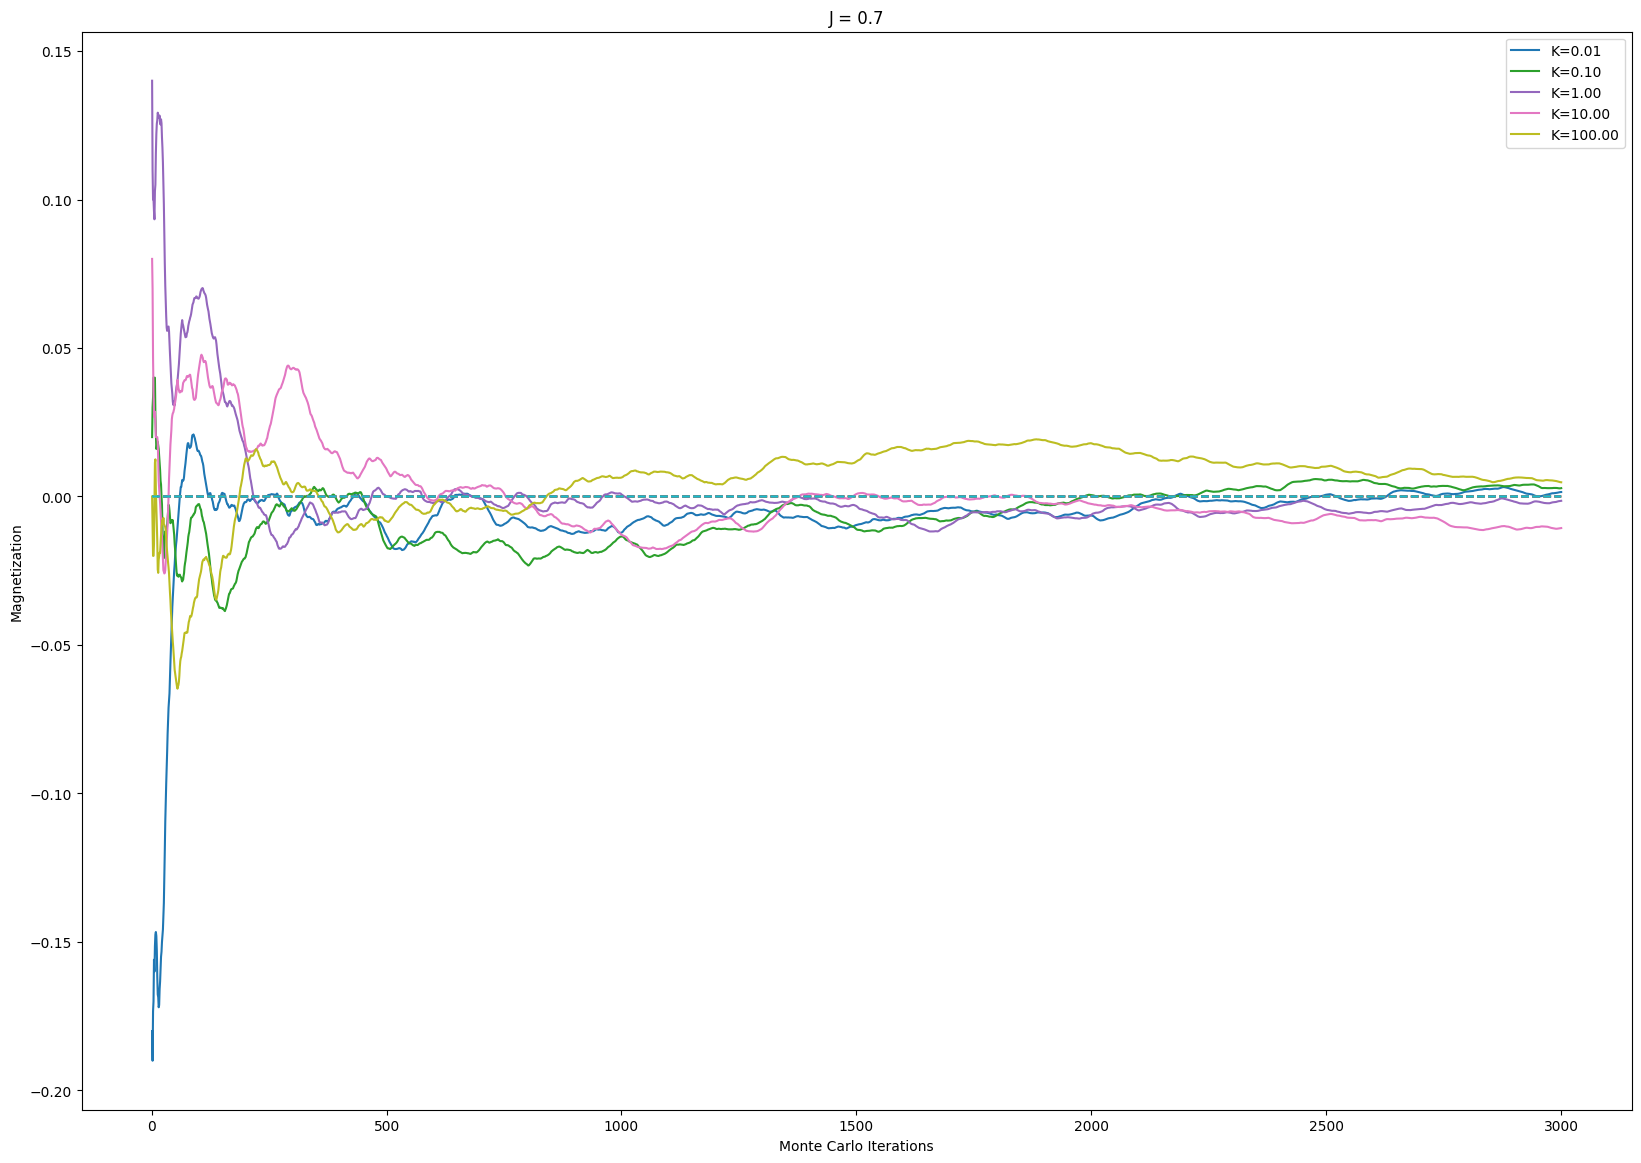

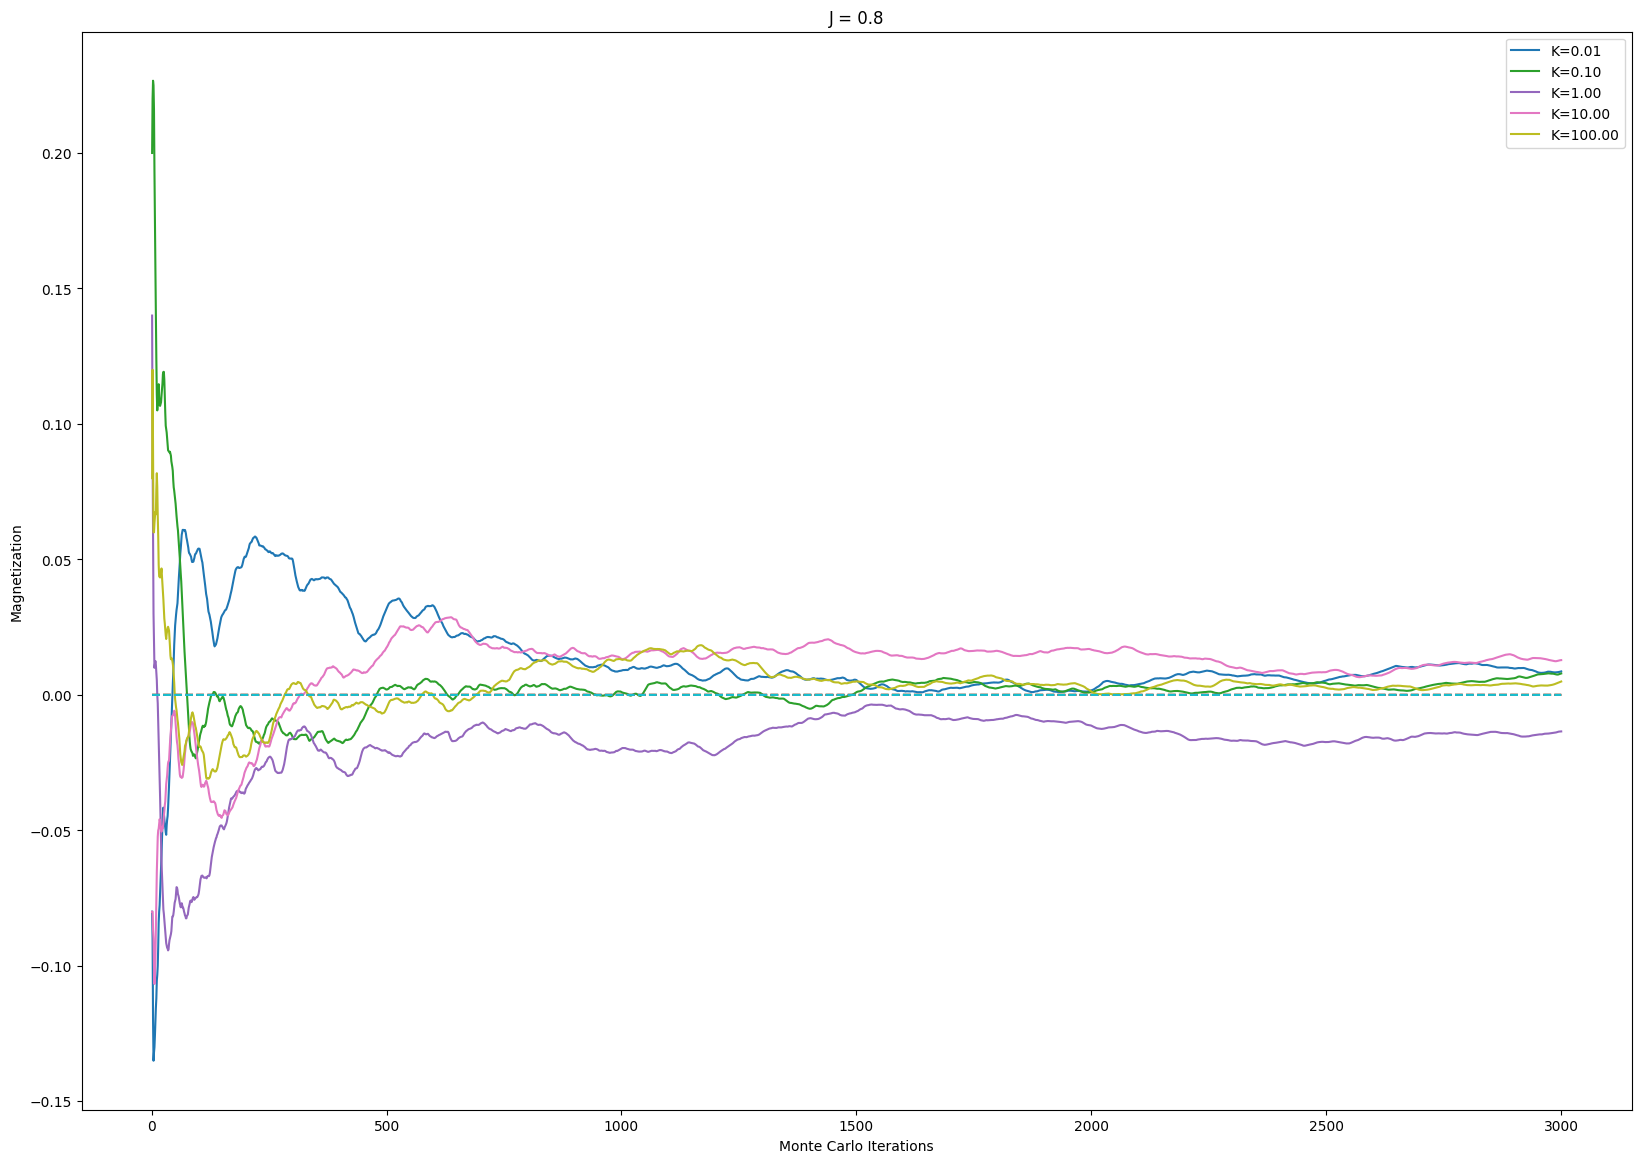

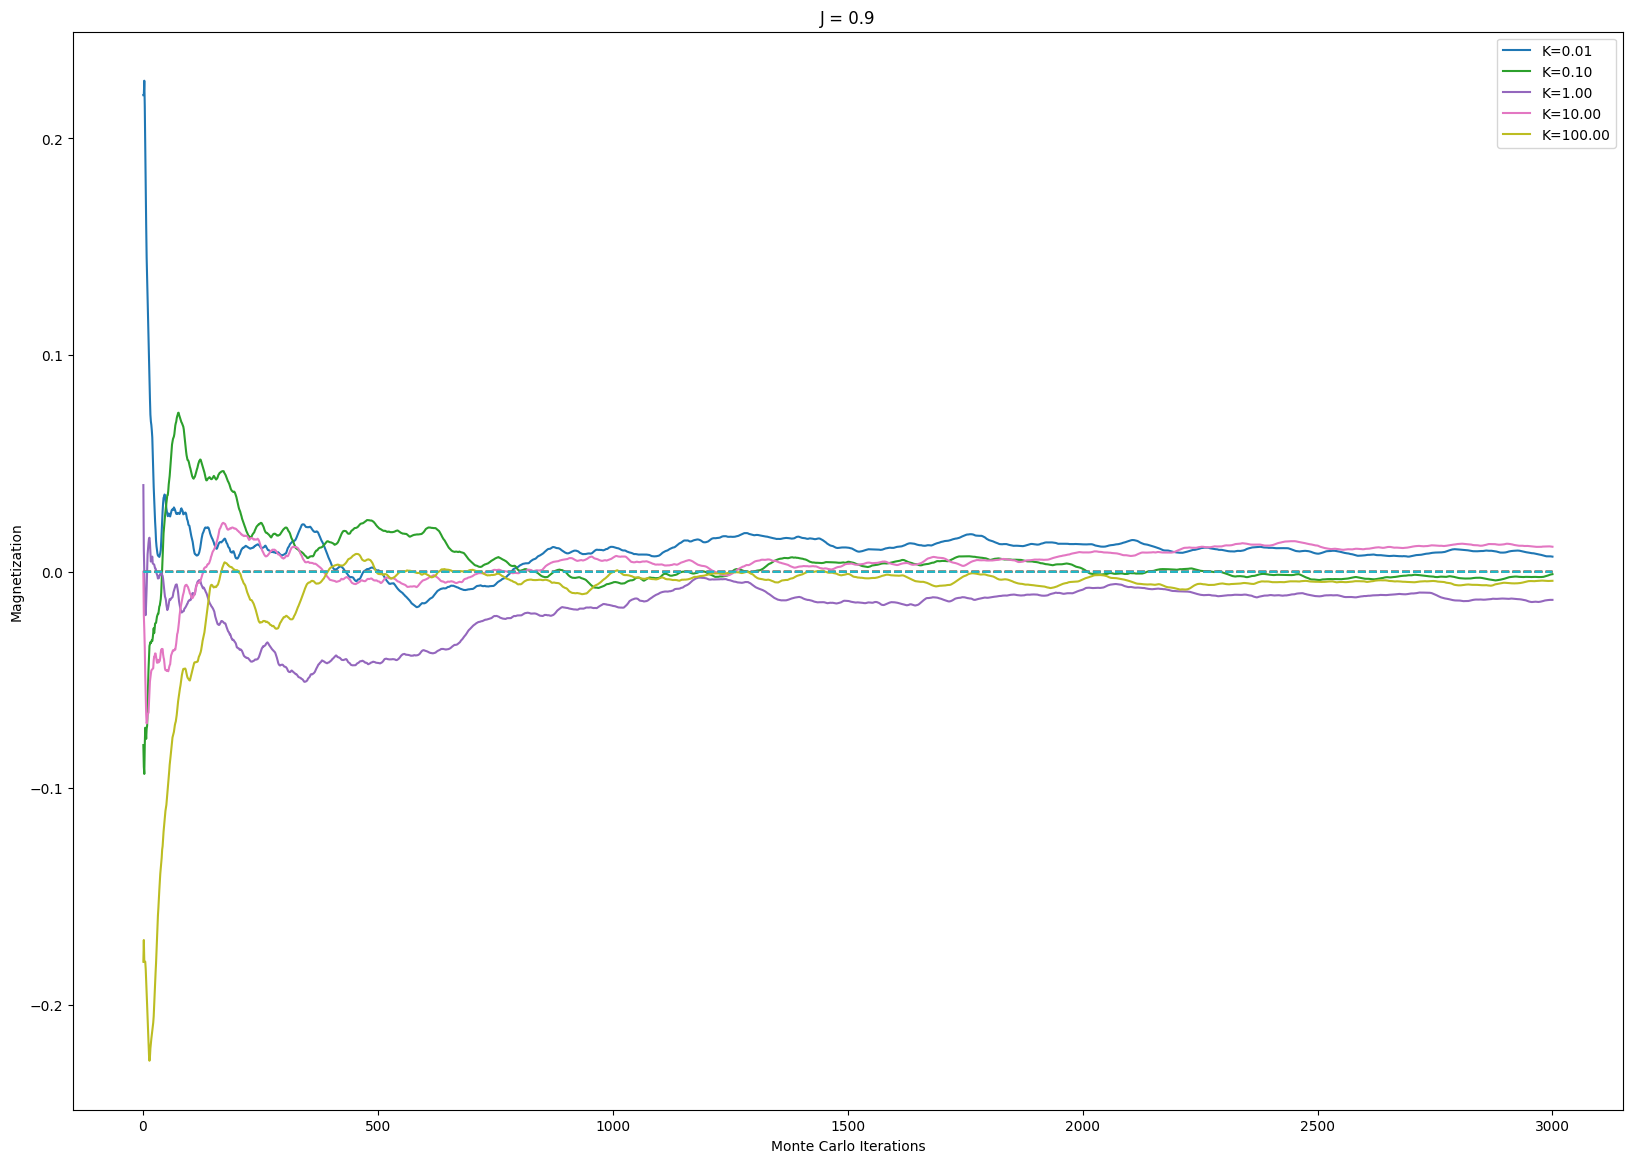

In [ ]:
z = np.zeros_like(x_pts)
for i in range(len(M_all)):
    plt.figure(figsize=(20, 14))
    for j in range(len(M_all[i])):
        plt.title(f"J = {a[i]:.1f}")
        plt.plot(x_pts, M_all[i, j, :], label=f"K={b[j]:.2f}")
        plt.plot(x_pts, z, linestyle='--')
        plt.xlabel('Monte Carlo Iterations')
        plt.ylabel('Magnetization')
    plt.legend()
    plt.show()

To plot the absolute values of moving averages of Magnetization with Monte Carlo Steps


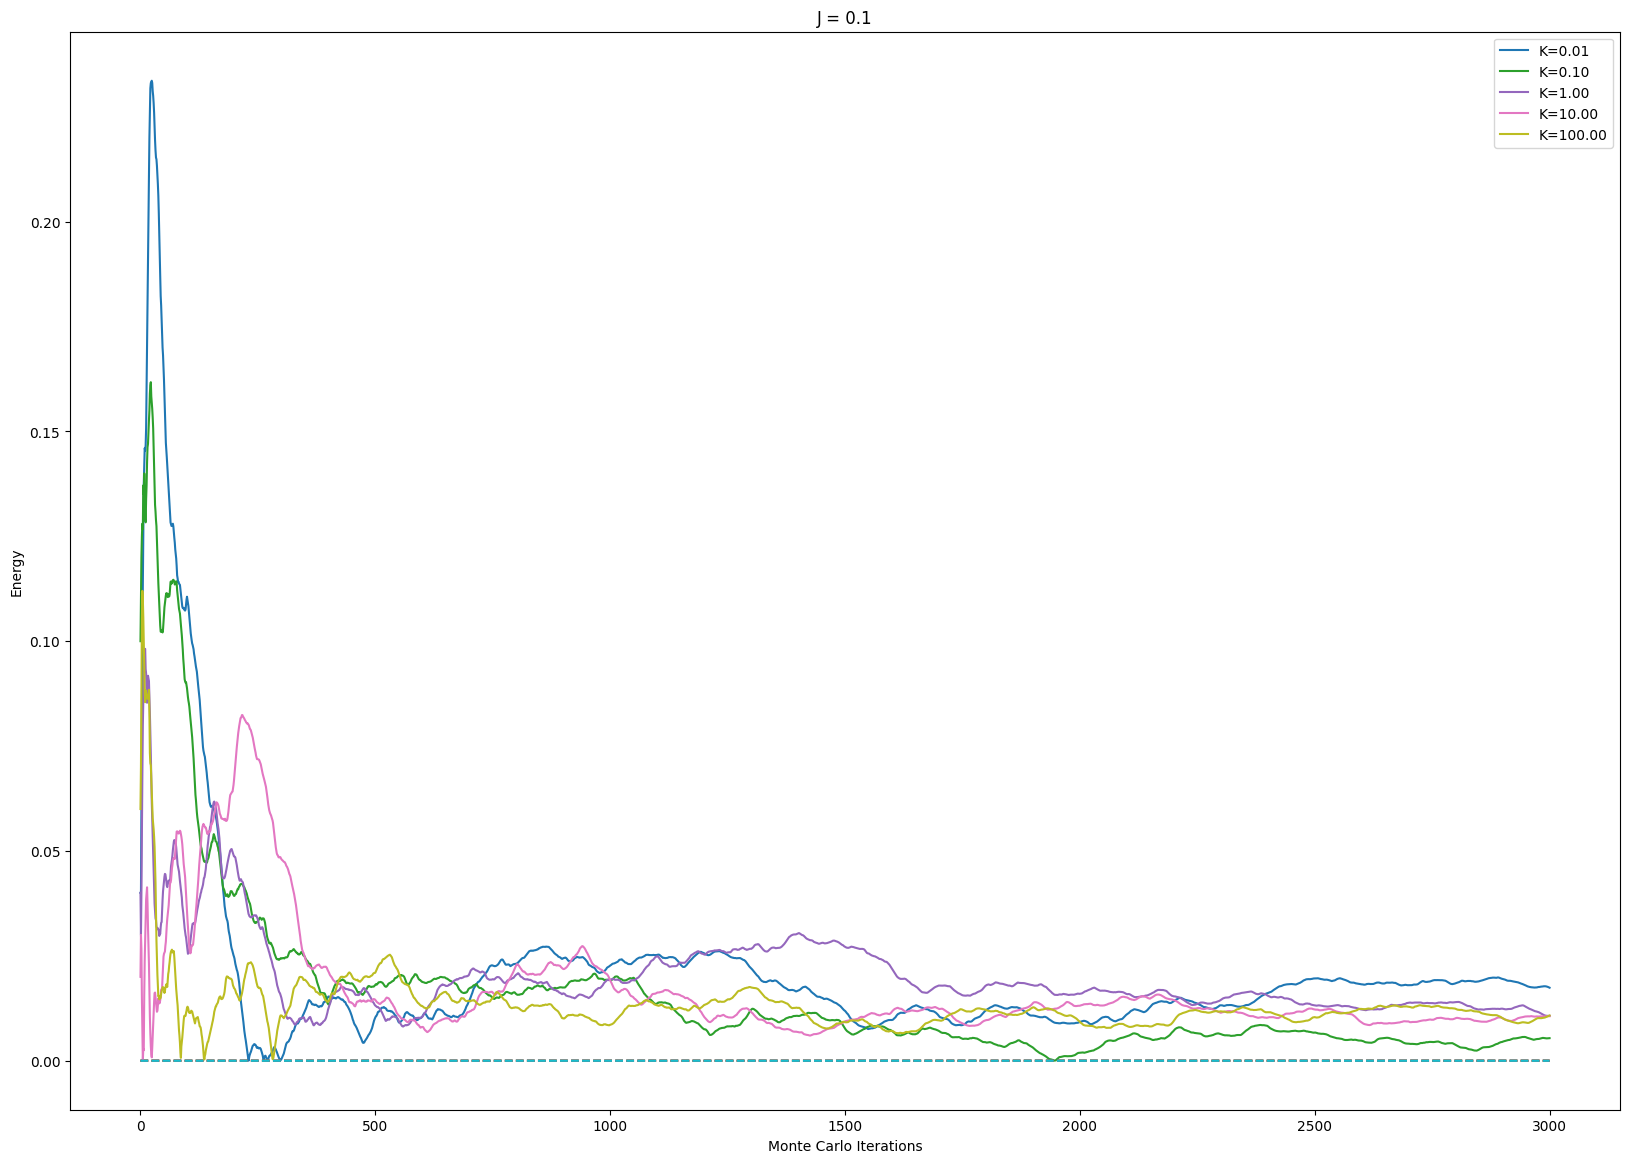

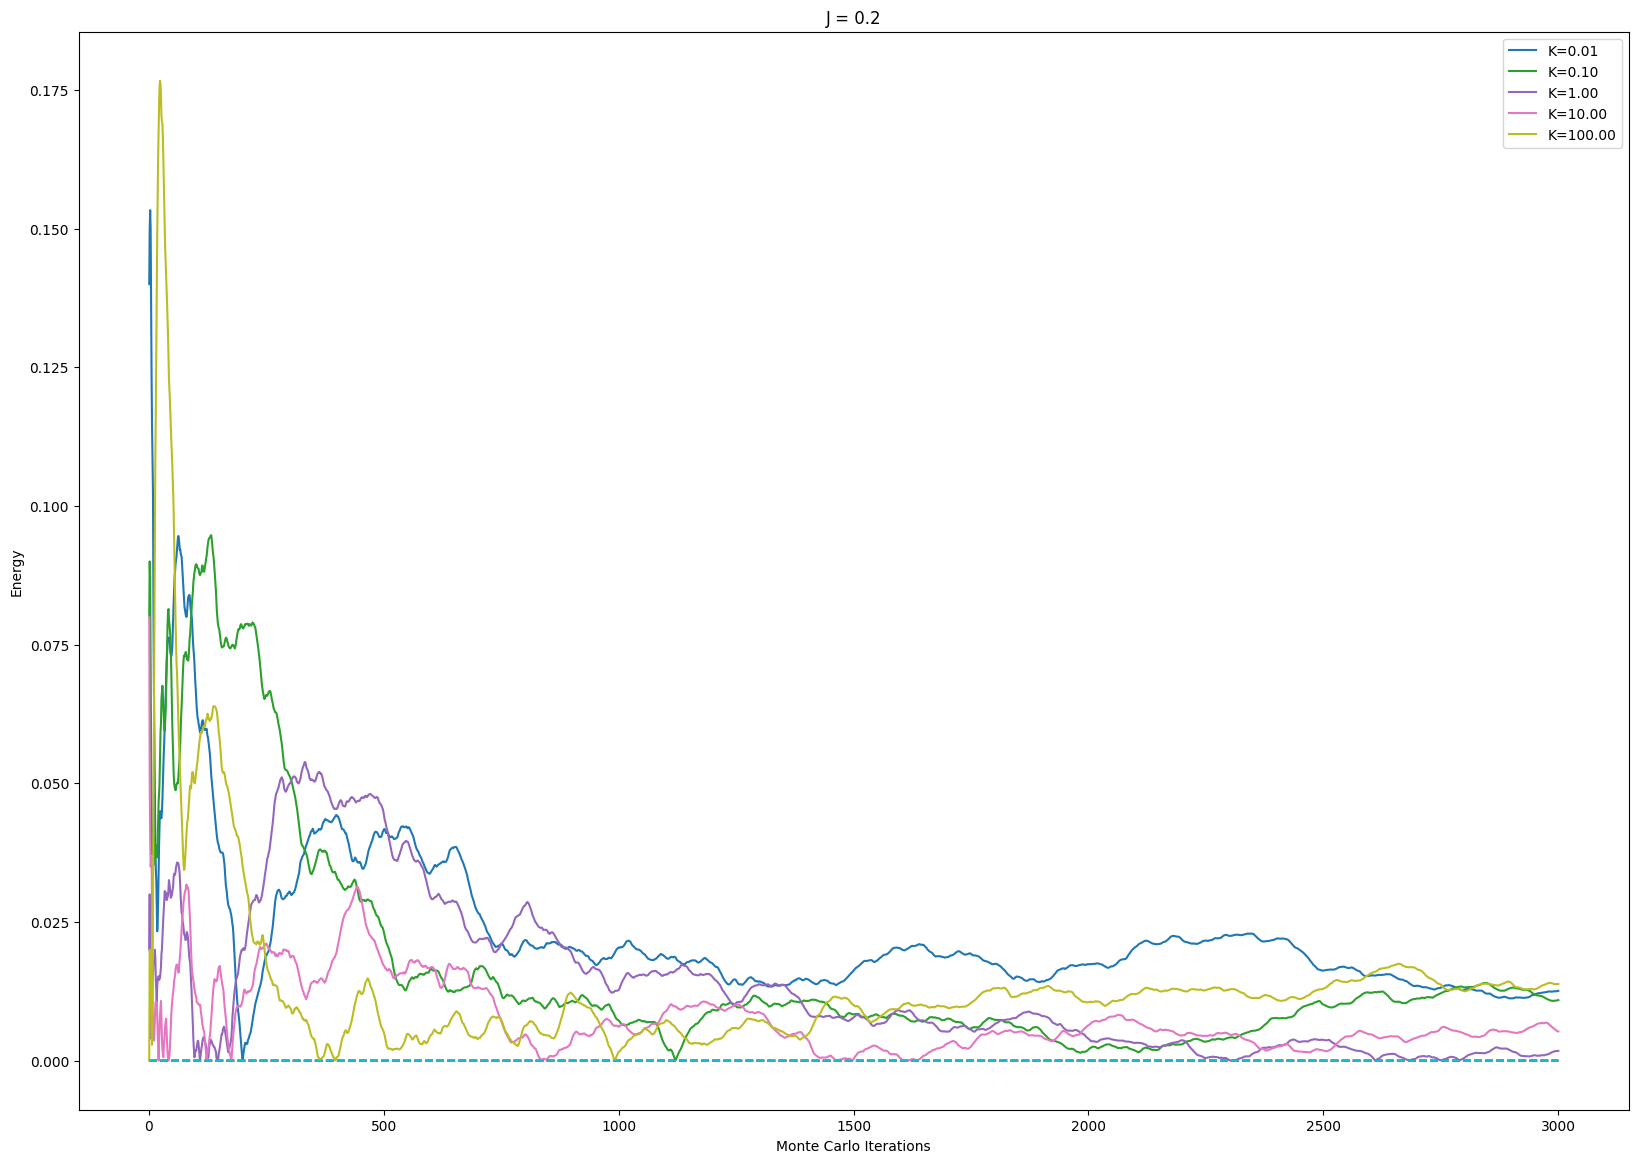

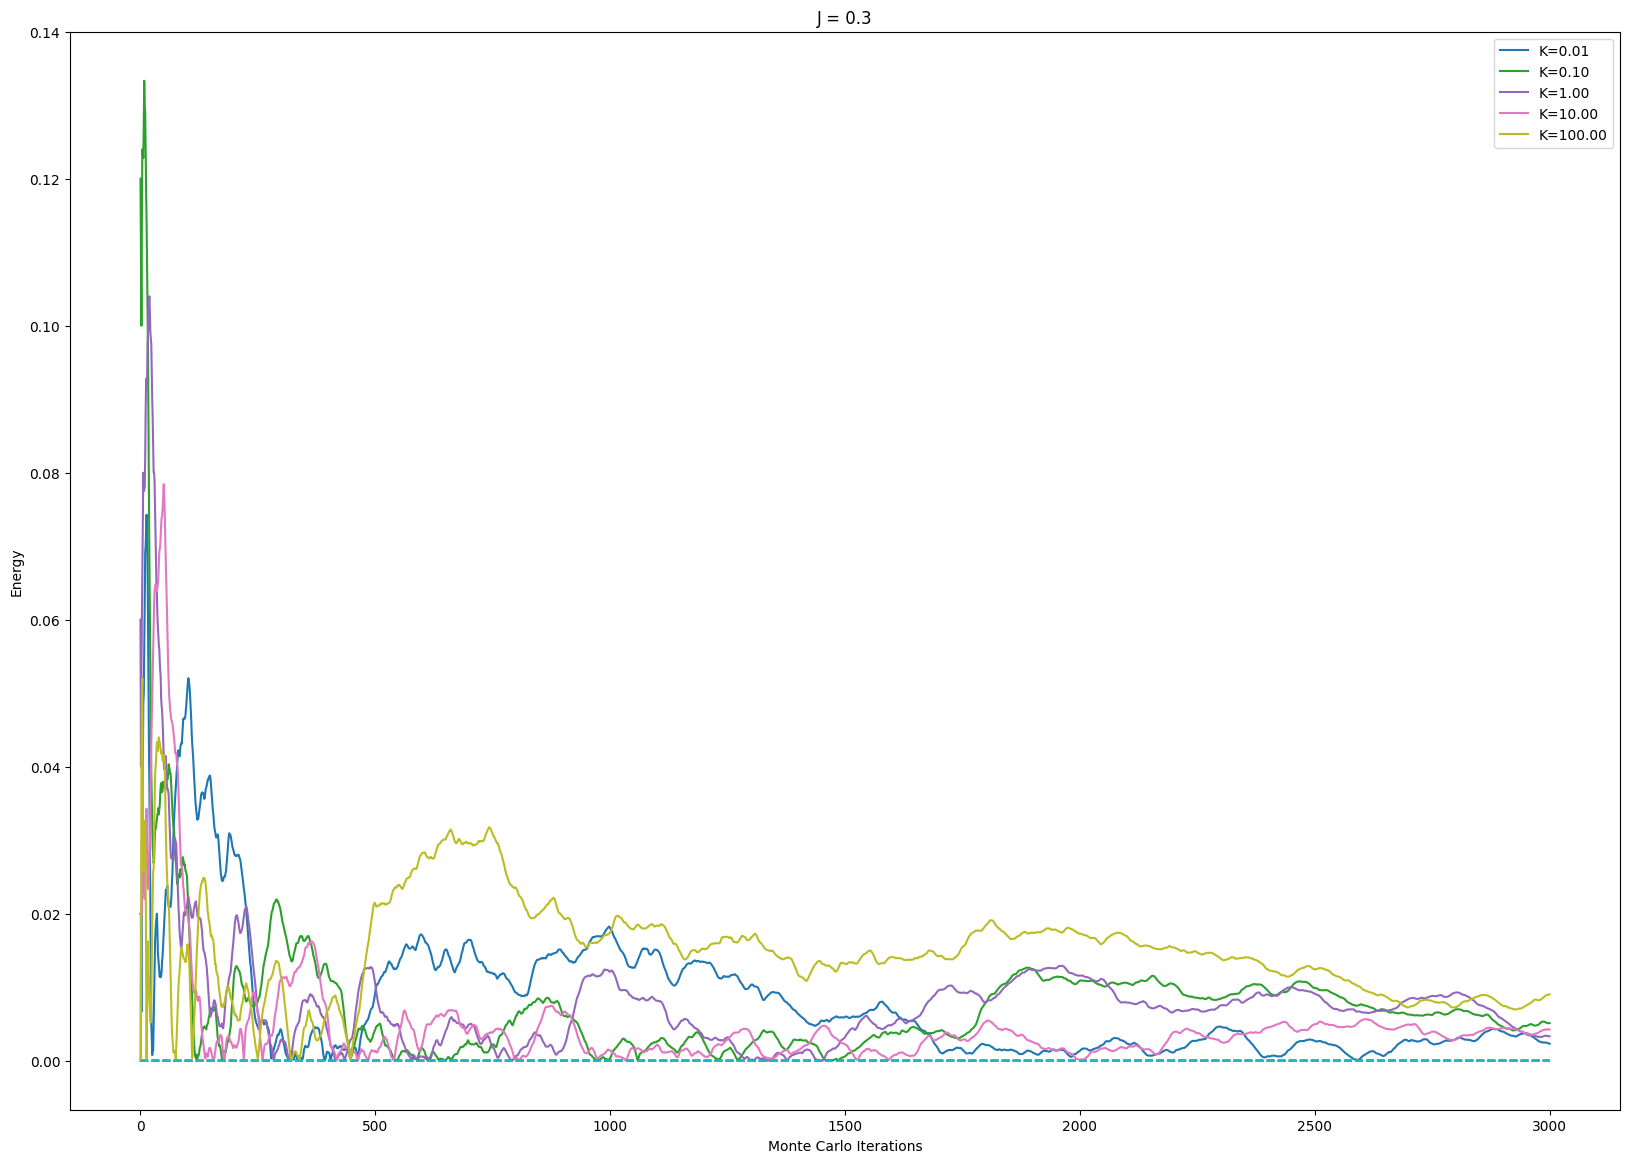

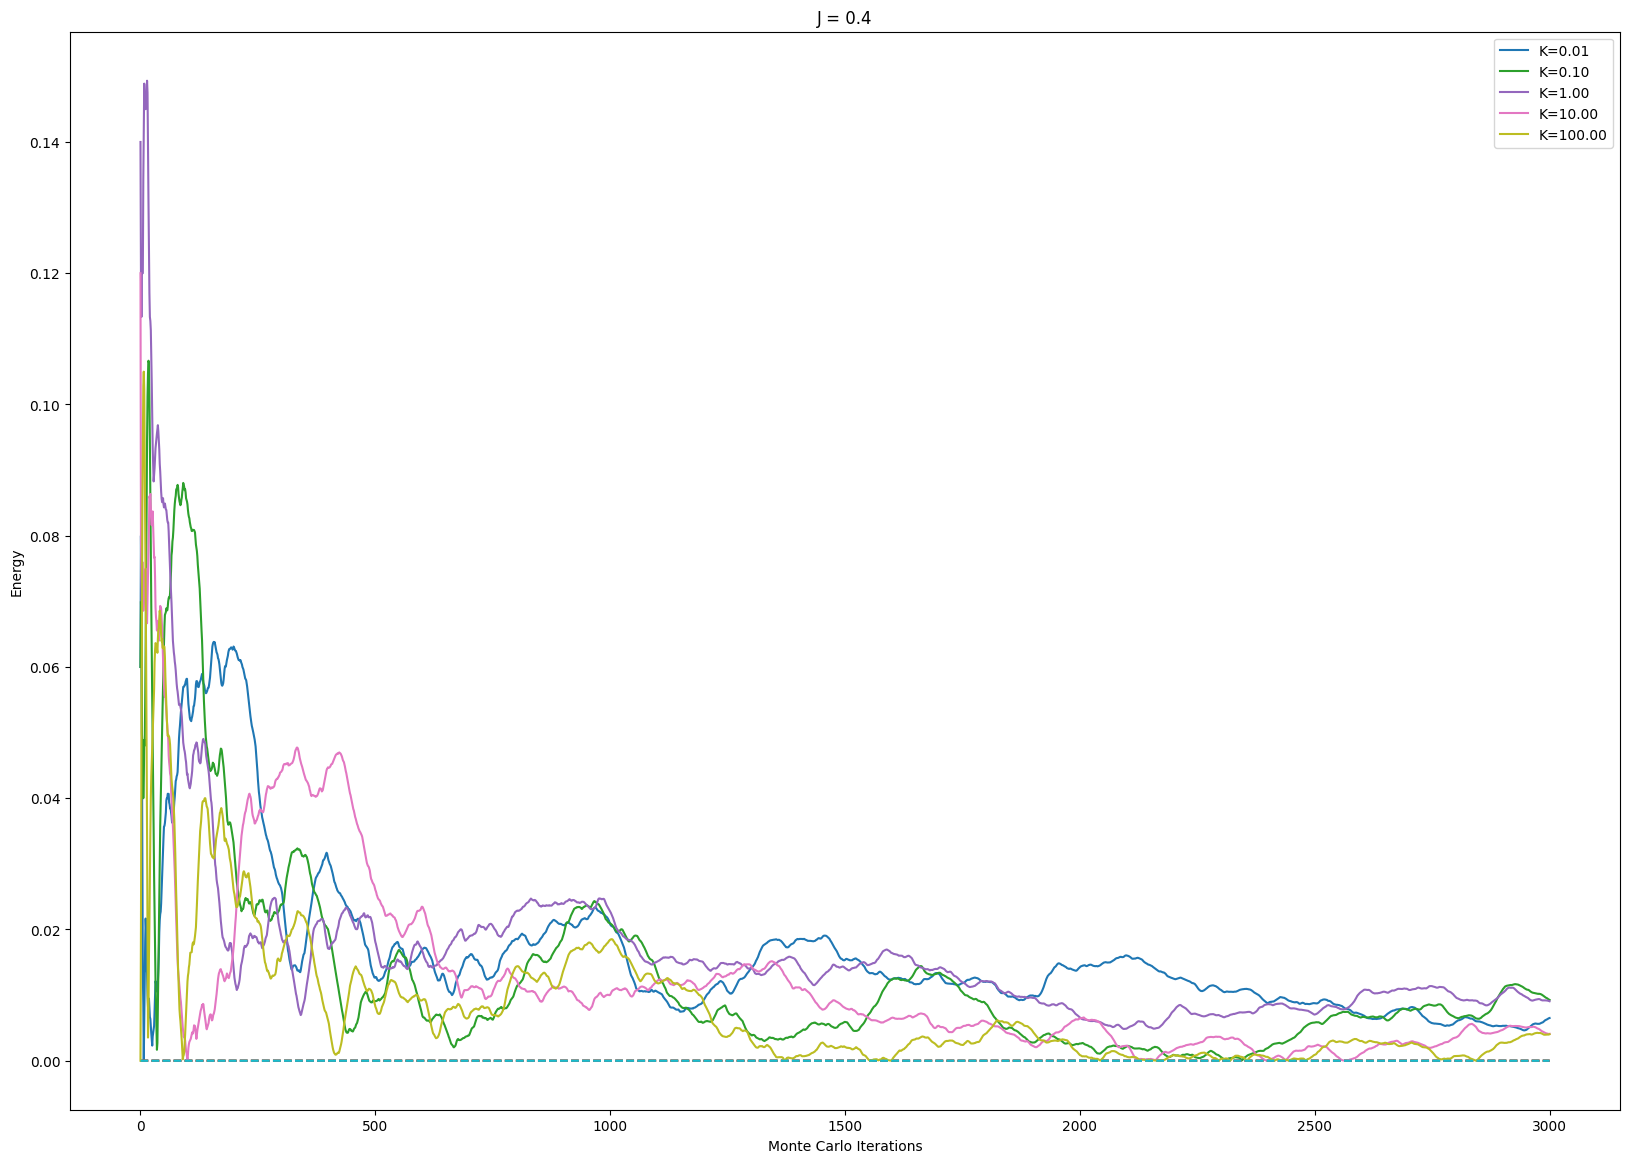

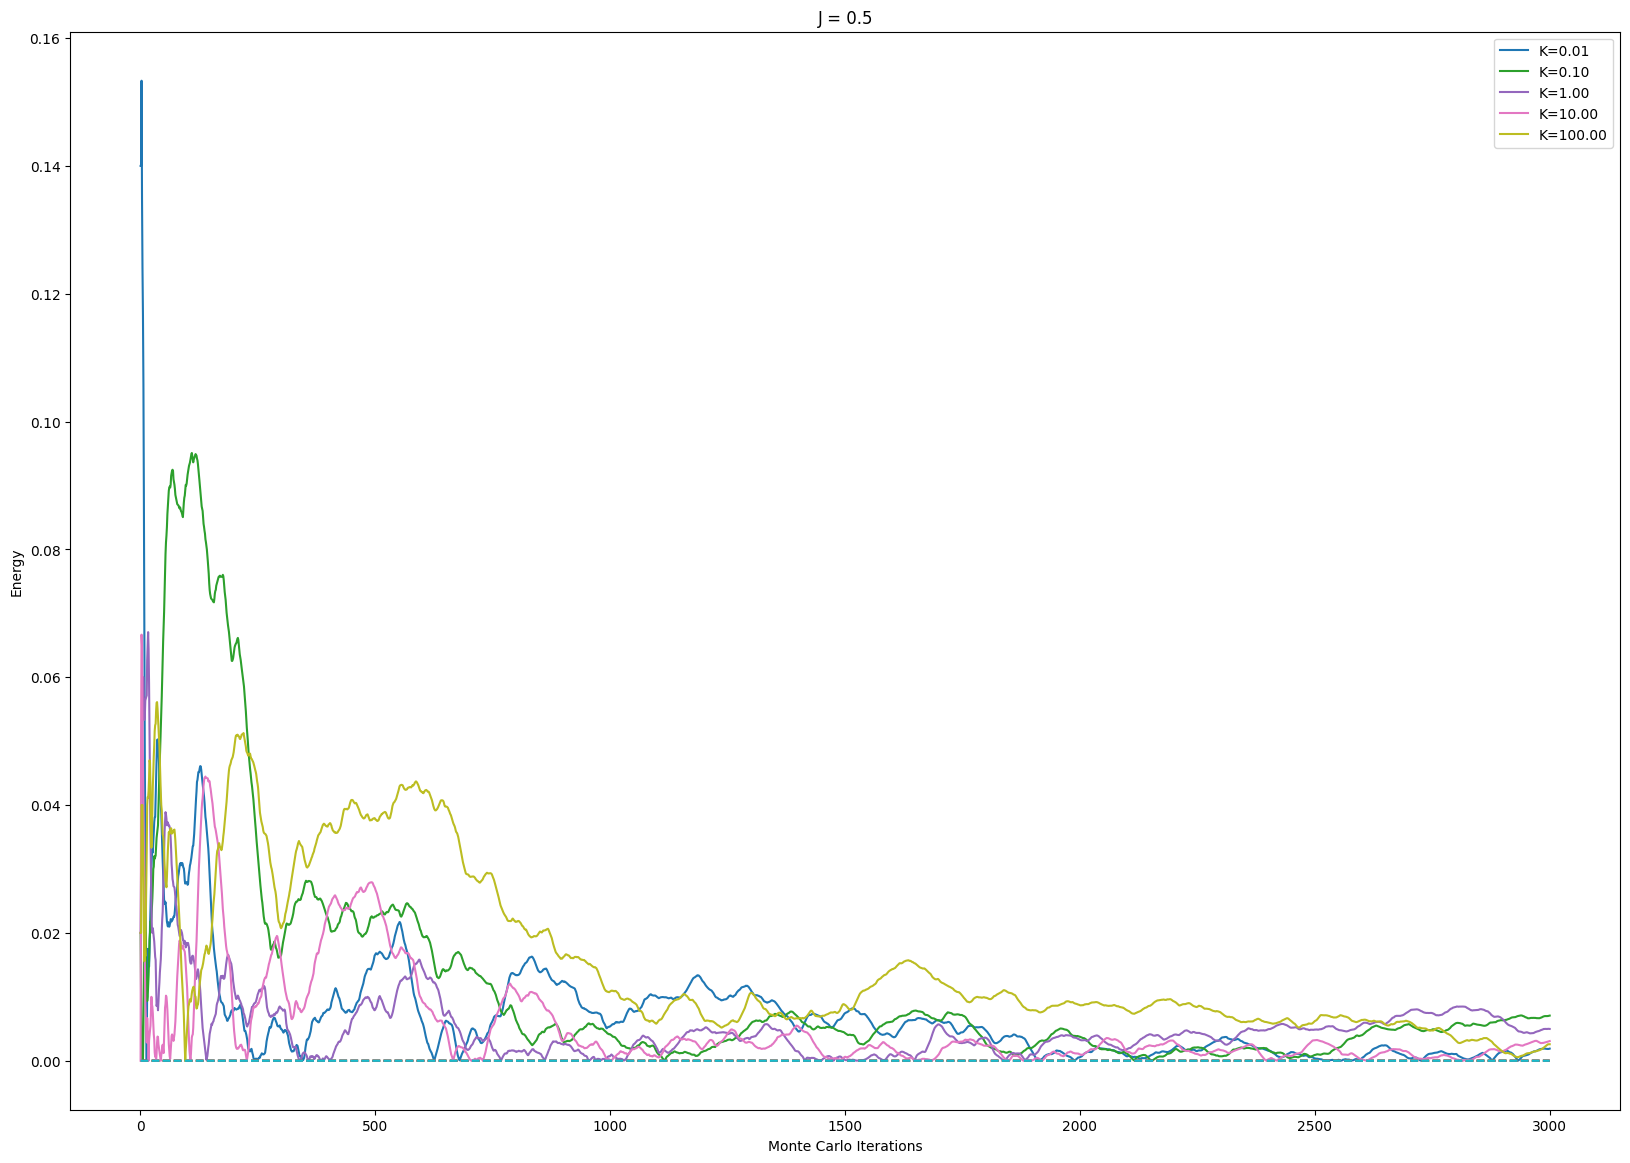

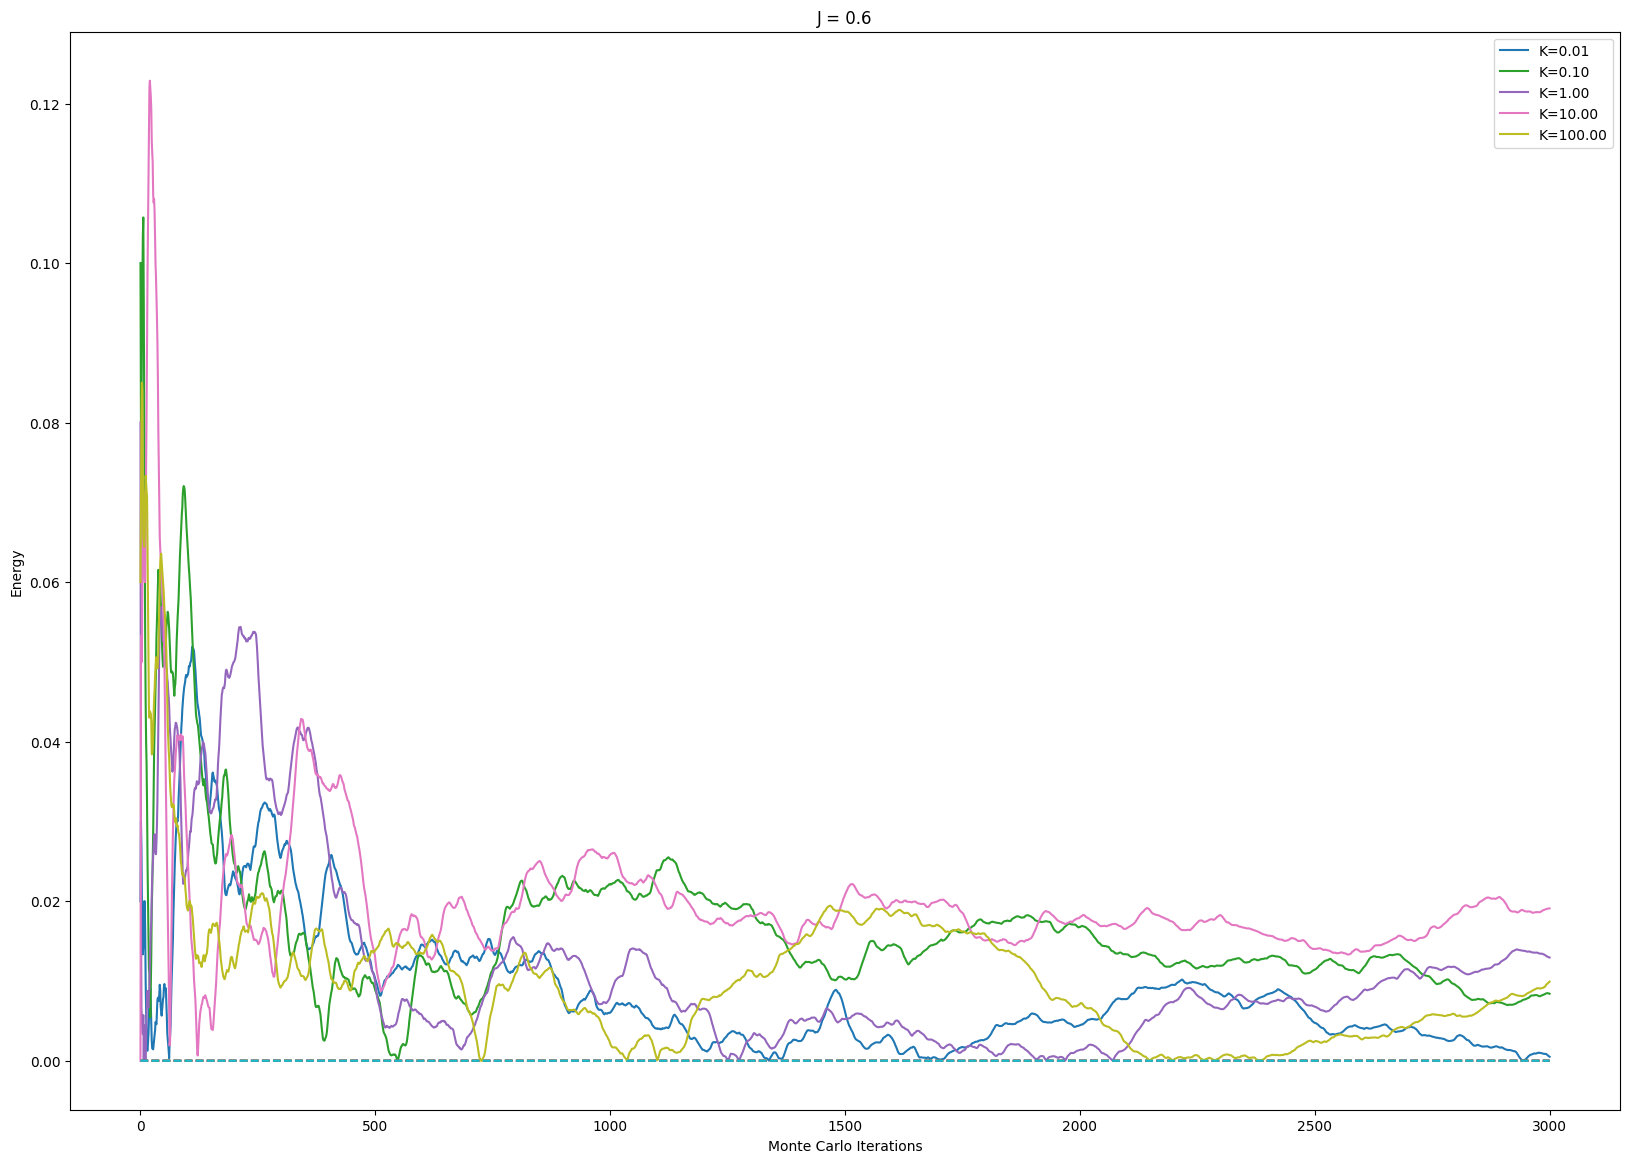

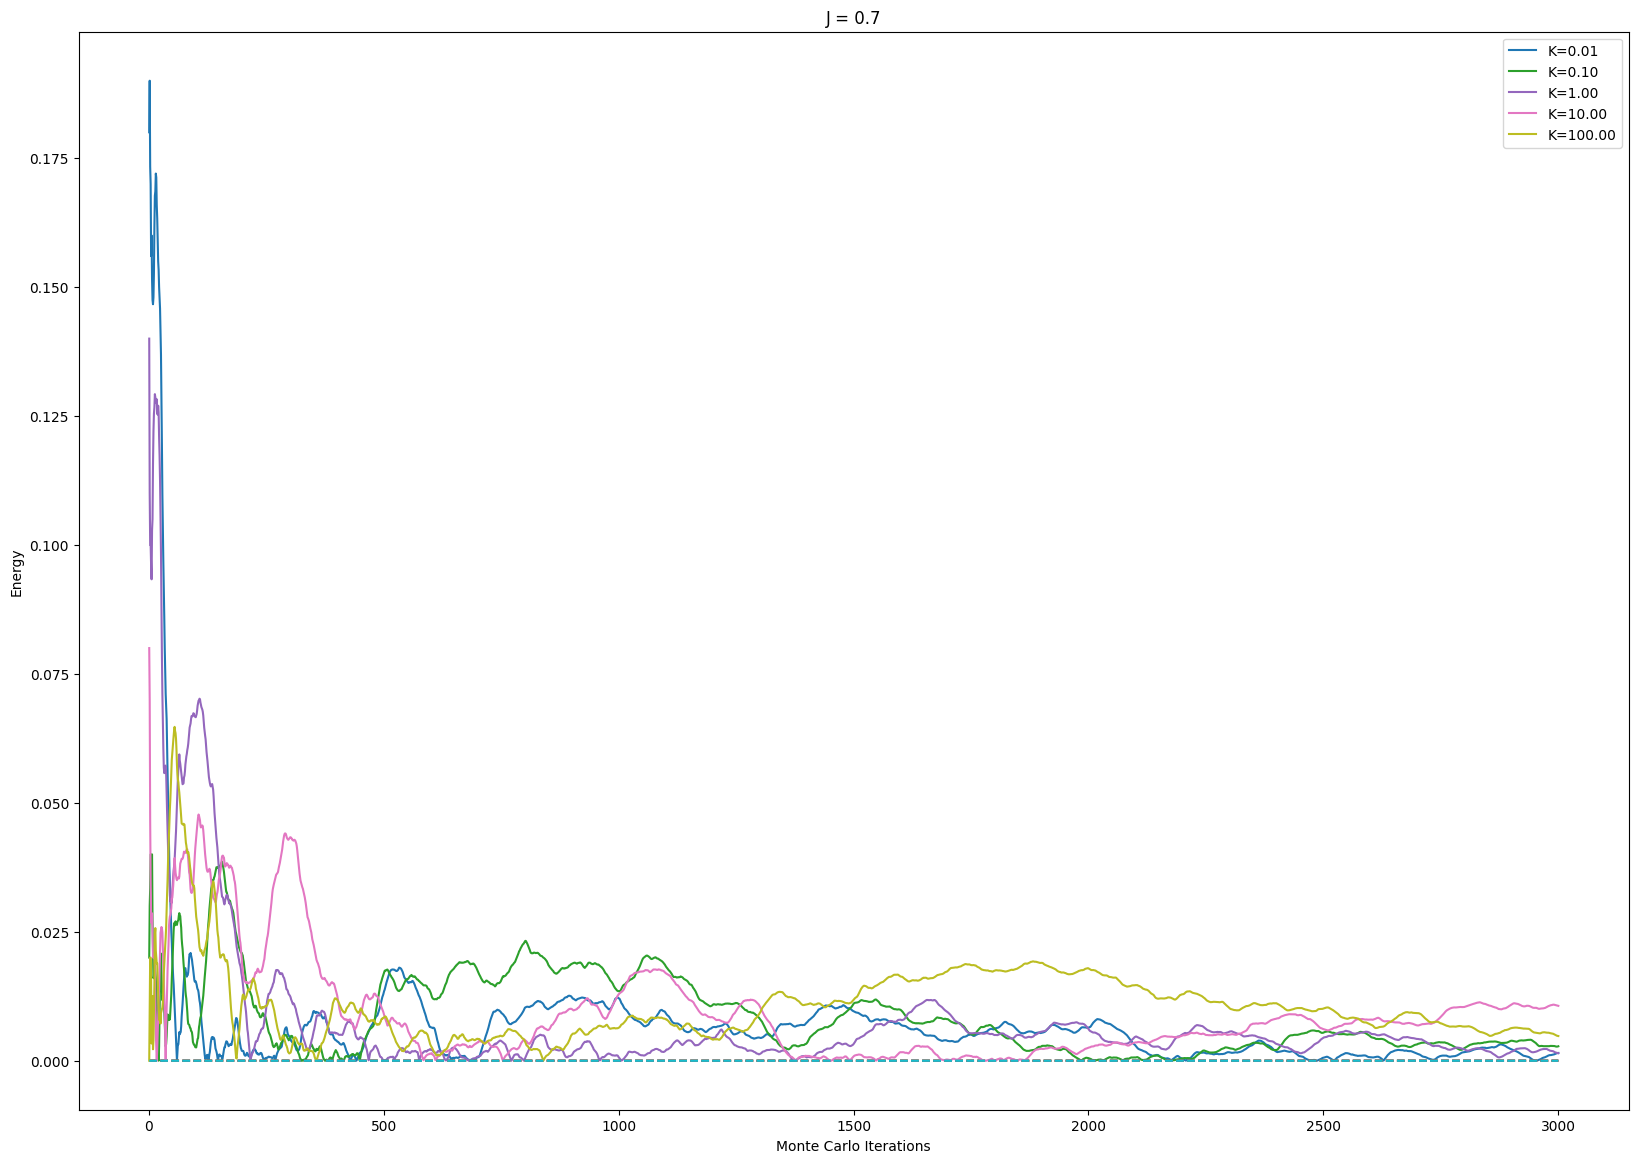

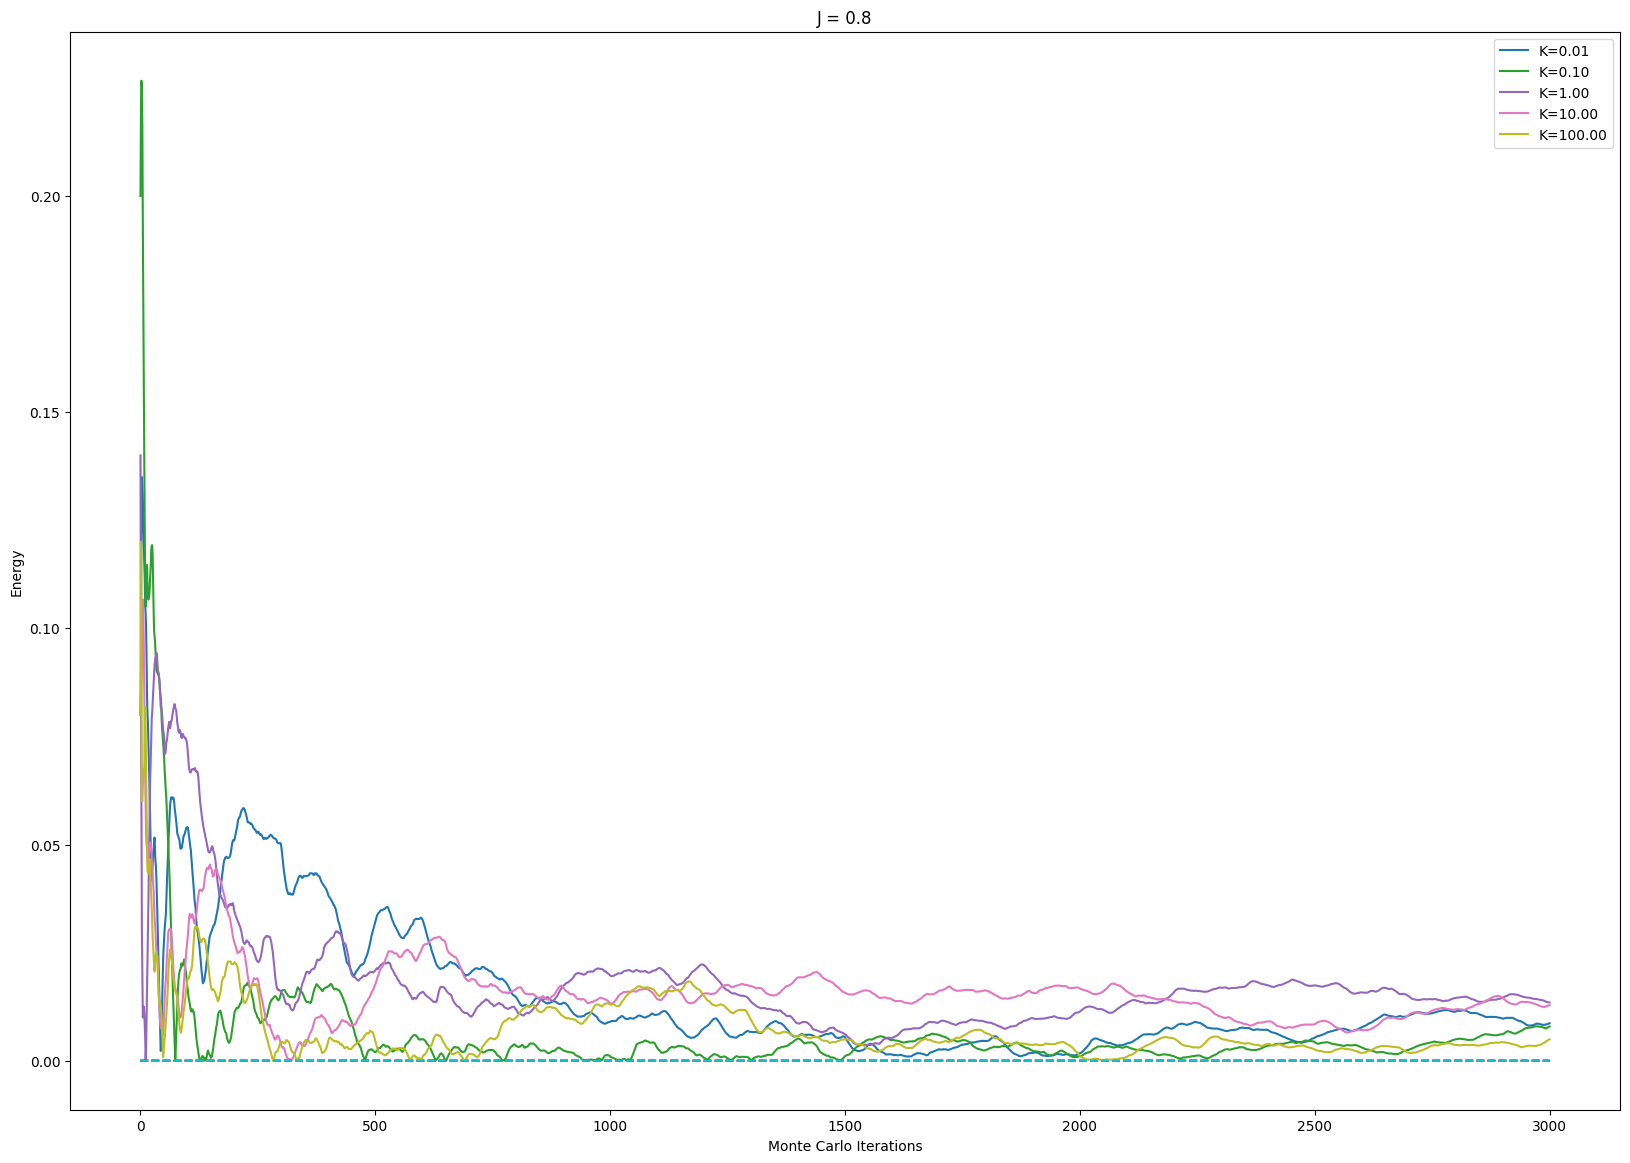

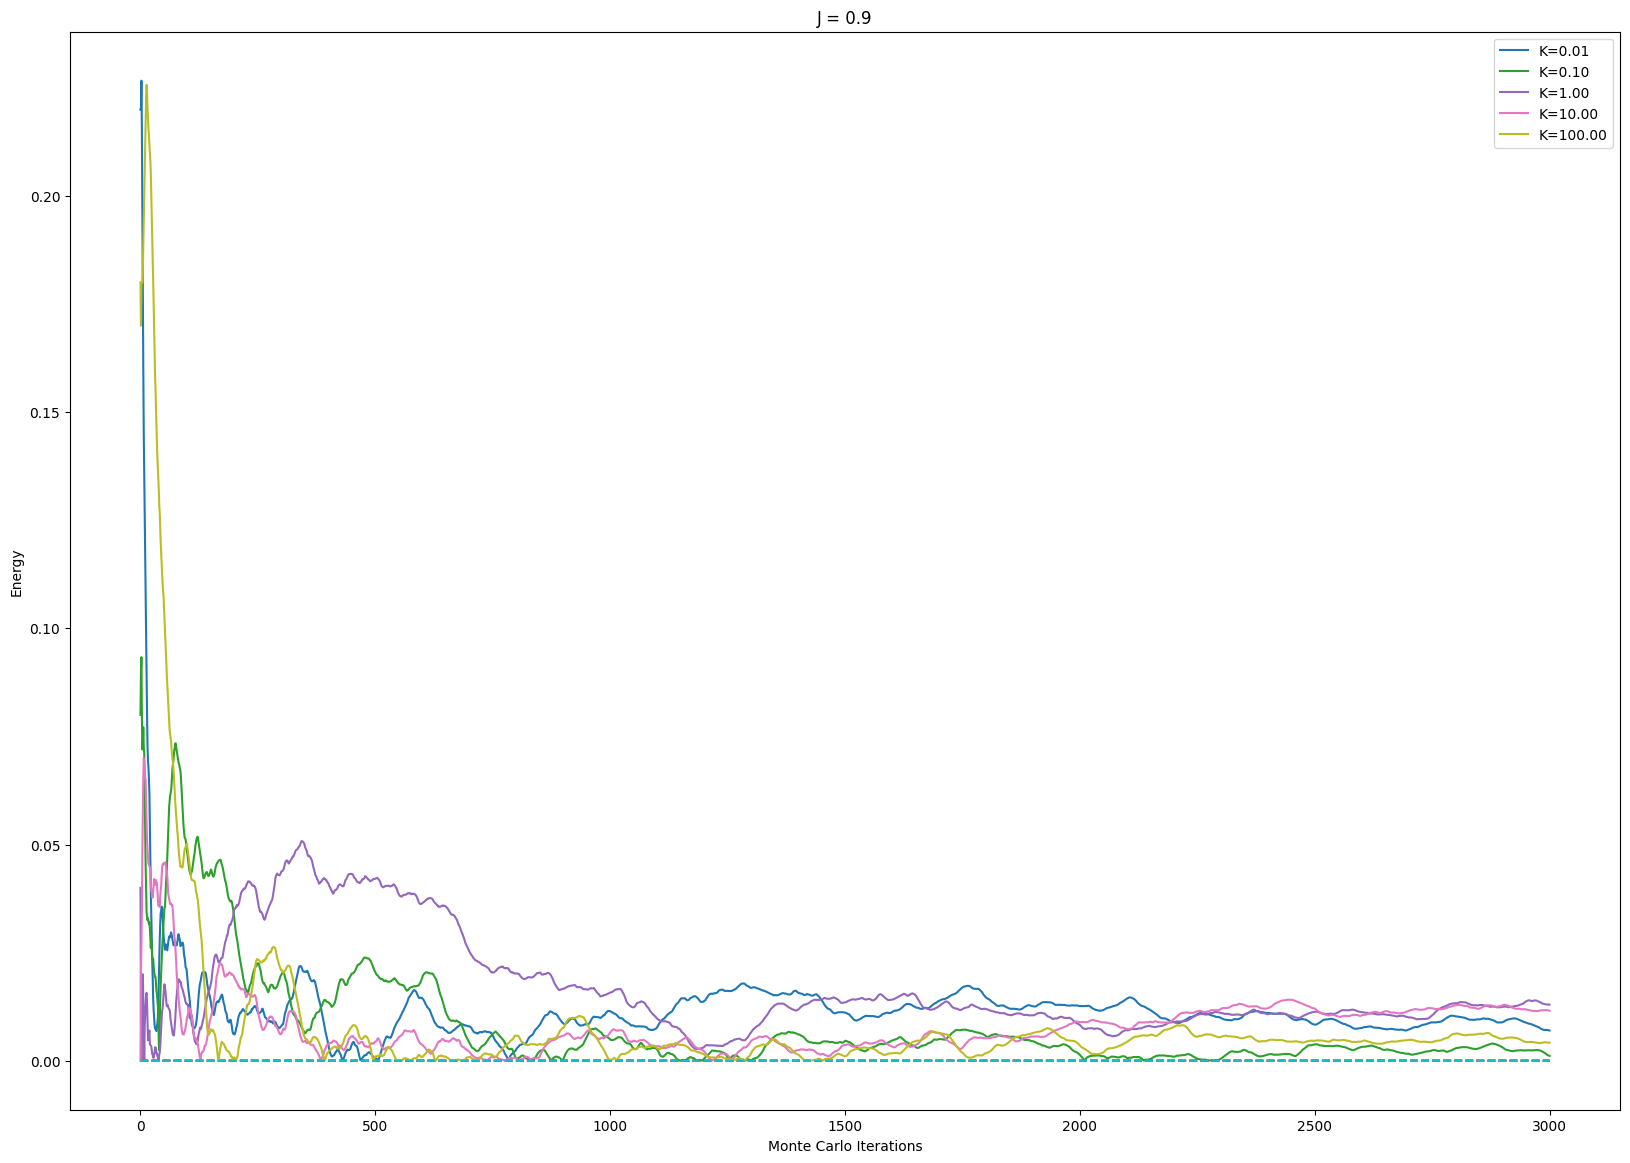

In [ ]:
for i in range(len(M_all)):
    plt.figure(figsize=(20, 14))
    for j in range(len(M_all[i])):
        plt.title(f"J = {a[i]:.1f}")
        plt.plot(x_pts, np.abs(M_all[i, j, :]), label=f"K={b[j]:.2f}")
        plt.plot(x_pts, z, linestyle='--')
        plt.xlabel('Monte Carlo Iterations')
        plt.ylabel('Energy')
    plt.legend()
    plt.show()